Group 2 Project - NFL Team Analysis for Investment Purposes

This project will start out with the gathering of team and player information from sources on the web and then will look at processing and presenting that information for the purposes of potentially purchasing an NFL team as an investment.

The First Cell will cover any installs that might be needed to run the tools later on in the code

******IMPORTANT NOTE*********** Do not run all cells on this notebook, there are Dashboards as the end that will not run at the same time.

In [4]:
#Install FuzzyWuzzy
#pip install fuzzywuzzy


#Install Plotly
# conda install -c plotly plotly=5.6.0

#Install dash and jupyter-dash
#pip install dash
#pip install -U jupyter
#pip install jupyter-dash
#pip install statsmodels
#install ipyLeaflet
#conda install -c conda-forge ipyleaflet

This next cell is to correct potential SSL issues with a Site that we are gathering data from

In [1]:
import urllib.request
import ssl


def main():
    ssl._create_default_https_context = ssl._create_unverified_context
    r = urllib.request.urlopen('https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Football_League/National_Football_League_team_abbreviations')
    print(r.status)
    print(r)


if __name__ == '__main__':
    main()

200


In [2]:
import urllib.request
import ssl


def main():
    ssl._create_default_https_context = ssl._create_unverified_context
    r = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums')
    print(r.status)
    print(r)


if __name__ == '__main__':
    main()

200


Next Step is to do our initial imports and setup

In [3]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from dash import Dash, dcc, html
import plotly.express as px

import math
import statistics
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pathlib import Path


import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

# Display full number versus scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

C:\Users\Joe_P\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Now we will Define our Function that will be used later in the data processing steps

In [4]:
def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=2):
    s = df_2[key2].tolist()
    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))
    df_1['matches'] = m
    
    m2 = df_1['matches'].apply(lambda x:', '.join([i[0] for i in x if i[1] >= threshold]))
    df_1['matches'] = m2
    
    return df_1

Now, to start gathering our data in DataFrames.

In [5]:
#TODO: Webscrape Player Stats for 2021 - Table 1
NFL_APT_2021 = pd.read_html("http://nflsavant.com/targets.php?rz=all&ddlYear=2021&week=&ddlTeam=&ddlPosition=")

print("APT = All Passing Attempts")
print()
APT_2021 = pd.concat(NFL_APT_2021)
APT_2021.columns =['APTRank#', 'Player Name', 'Team_A', 'Position', 'Compl', 'Targeted', 'Compl%', 'TD#']
APT_2021.head()

APT = All Passing Attempts



,APTRank#,Player Name,Team_A,Position,Compl,Targeted,Compl%,TD#
0,1.000,Cooper Kupp,LA,WR,134,178,75.280,15
1,2.000,Diontae Johnson,PIT,WR,98,158,62.030,7
2,3.000,Tyreek Hill,KC,WR,110,156,70.510,10
3,4.000,Davante Adams,GB,WR,109,155,70.320,10
4,5.000,Justin Jefferson,MIN,WR,98,154,63.640,9


In [6]:
#TODO: Webscrape Player Stats for 2021 - Table 2
NFL_RZRA_2021 = pd.read_html("http://nflsavant.com/targets.php?rz=redzone_rush&ddlYear=2021&week=&ddlTeam=&ddlPosition=")

print("RZRA = Red Zone Rushing Attempts")
print()
RZRA_2021 = pd.concat(NFL_RZRA_2021)
RZRA_2021.columns =['RZRARank#', 'Player Name', 'Team_A', 'Position', 'RZRRush#', 'RZRTD#']
RZRA_2021.head()

RZRA = Red Zone Rushing Attempts



,RZRARank#,Player Name,Team_A,Position,RZRRush#,RZRTD#
0,1.000,Jonathan Taylor,IND,RB,83,11
1,2.000,Antonio Gibson,WAS,RB,49,6
2,3.000,Dalvin Cook,MIN,RB,47,6
3,4.000,Leonard Fournette,TB,RB,43,6
4,5.000,Ezekiel Elliott,DAL,RB,42,10


In [7]:
#TODO: Webscrape Player Stats for 2021 - Table 3
NFL_RZT_2021 = pd.read_html("http://nflsavant.com/targets.php?rz=redzone&ddlYear=2021&week=&ddlTeam=&ddlPosition=")

print("RZT = Red Zone Targets")
print()
RZT_2021 = pd.concat(NFL_RZT_2021)
RZT_2021.columns =['RZTRank#', 'Player Name', 'Team_A', 'Position', 'RZCompl', 'RZTargeted', 'RZCompl%', 'RZTD#']
RZT_2021.head()

RZT = Red Zone Targets



,RZTRank#,Player Name,Team_A,Position,RZCompl,RZTargeted,RZCompl%,RZTD#
0,1.000,Cooper Kupp,LA,WR,25,36,69.440,12
1,2.000,Stefon Diggs,BUF,WR,20,33,60.610,9
2,3.000,Davante Adams,GB,WR,19,31,61.290,9
3,4.000,Keenan Allen,LAC,WR,20,27,74.070,5
4,5.000,Chris Godwin,TB,WR,20,27,74.070,5


In [8]:
#TODO: Webscrape NFL Attendance stats for 2021
NFL_Att_2021 = pd.read_html("http://www.espn.com/nfl/attendance")

print("Att = Attendance")
print()
Att_2021 = pd.concat(NFL_Att_2021)

Att_2021.columns =['AttRank#', 'Team_City', 'H_Games', 'H_Total', 'H_Avg', 'H_Pct%', 'R_Games'
                   , 'R_Total', 'R_Avg', 'R_Pct%', 'O_Games', 'O_Total', 'O_Avg', 'O_Pct%']

Att_2021 = Att_2021.drop([0,1])
Att_2021['ORank1'] = Att_2021['O_Total'].rank(ascending=False)
Att_2021['ORank2'] = Att_2021['O_Avg'].rank(ascending=False)
Att_2021['ORank3'] = Att_2021['O_Pct%'].rank(ascending=False)
Att_2021['ORAvg'] = (Att_2021['ORank1'] + Att_2021['ORank2'] + Att_2021['ORank3']) / 3
Att_2021['ORAvg'] = Att_2021['ORAvg'].round(decimals=2)
Att_2021 = Att_2021.sort_values('ORAvg')
Att_2021.head()

Att = Attendance



,AttRank#,Team_City,H_Games,H_Total,H_Avg,H_Pct%,R_Games,R_Total,R_Avg,R_Pct%,O_Games,O_Total,O_Avg,O_Pct%,ORank1,ORank2,ORank3,ORAvg
4,3,Denver,9,686129,76236,100.1,8,557752,69719,93.6,17,1243881,73169,97.1,2.000,2.000,8.000,4.000
9,8,Los Angeles,8,572791,71598,100.1,9,614995,68332,96.3,17,1187786,69869,98.1,6.000,6.000,3.000,5.000
6,5,Kansas City,9,659044,73227,100.4,8,533901,66737,93.7,17,1192945,70173,97.3,5.000,5.000,6.000,5.330
2,1,Dallas,8,747368,93421,93.4,9,619498,68833,95.3,17,1366866,80403,94.3,1.000,1.000,20.000,7.330
17,16,Cleveland,9,606879,67431,100.0,8,553125,69140,98.3,17,1160004,68235,99.2,11.000,11.000,1.000,7.670


In [9]:
#TODO: Webscrape NFL Team Names and Abbreviations to link future tables
NFL_TNA_2021 = pd.read_html("https://en.wikipedia.org/wiki/Wikipedia:WikiProject_National_Football_League/National_Football_League_team_abbreviations")

print("TNA = Team Name & Abbreviation")
print()
TNA_2021 = pd.concat(NFL_TNA_2021)
TNA_2021.columns =['Team_A', 'Team_O', 'Team_Name']

TNA_2021 = TNA_2021.drop([0])
TNA_2021.head()

TNA = Team Name & Abbreviation



,Team_A,Team_O,Team_Name
1,ARZ,ARI,Arizona Cardinals
2,ATL,ATL,Atlanta Falcons
3,BLT,BAL,Baltimore Ravens
4,BUF,BUF,Buffalo Bills
5,CAR,CAR,Carolina Panthers


In [10]:
NFL_STM_2021 = pd.read_html("https://www.sportsmediawatch.com/nba-market-size-nfl-mlb-nhl-nielsen-ratings/")

print("STM = Sports Team Market")
print()
STM_2021 = pd.concat(NFL_STM_2021)
STM_2021.columns =['STMRank', 'Metro_City', 'Homes', 'NBA_Name', 'NFL_Name', 'MLB_Name', 'NHL_Name']
STM_2021 = STM_2021.drop([0])
tens = dict(k=10e3, m=10e6, b=10e9)
STM_2021['Homes'] = STM_2021['Homes'].apply(lambda x : int(float(x[0:-1]) * tens[x[-1].lower()]))
STM_2021['STMR#'] = STM_2021['Homes'].rank(ascending=True)
STM_2021['STMR#'] = STM_2021['STMR#'].astype(float)
STM_2021['STMR_Value'] = (((STM_2021['STMR#']) / len(STM_2021))) * 5

mat1 = []
mat2 = []
p = []
list1 = STM_2021['NFL_Name'].tolist()
list2 = TNA_2021['Team_Name'].tolist()
threshold = 100

for i in list1:
    mat1.append(process.extractOne(
      i, list2, scorer=fuzz.token_set_ratio))
STM_2021['matches'] = mat1

for j in STM_2021['matches']:
    if j[1] >= threshold:
        p.append(j[0])
    mat2.append(",".join(p))
    p = []

STM_2021['matches'] = mat2
STM_2021.rename(columns = {'matches' : 'Team_Name'}, inplace=True)
STM_2021 = STM_2021.sort_values(['Team_Name'], ascending=True)
nan_value = float("NaN")
STM_2021.replace("", nan_value, inplace=True)
STM_2021.dropna(subset = ["Team_Name"], inplace=True)

STM_2021.head()

STM = Sports Team Market



,STMRank,Metro_City,Homes,NBA_Name,NFL_Name,MLB_Name,NHL_Name,STMR#,STMR_Value,Team_Name
11,11,Phoenix,21580000,Suns,Cardinals,D’Backs,Coyotes,32.000,3.810,Arizona Cardinals
7,7,Atlanta,26490000,Hawks,Falcons,Braves,no team,36.000,4.286,Atlanta Falcons
28,28,Baltimore,11299999,no team,Ravens,Orioles,no team,15.000,1.786,Baltimore Ravens
41,53,Buffalo,6130000,no team,Bills,no team,Sabres,2.000,0.238,Buffalo Bills
22,22,Charlotte,12910000,Hornets,Panthers,no team,no team,21.000,2.500,Carolina Panthers


Homes (in Millions) 


<AxesSubplot:xlabel='Homes', ylabel='Metro_City'>

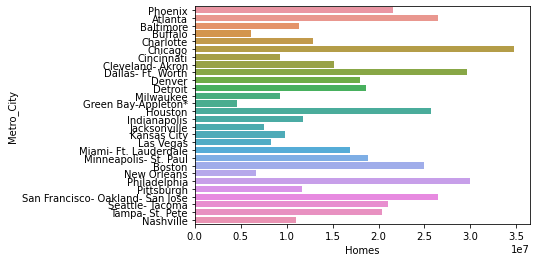

In [11]:
STM_2021['Homes'] = STM_2021['Homes'].astype(float)
print("Homes (in Millions) ")
sns.barplot(data=STM_2021, x="Homes", y="Metro_City")

In [12]:
Win_Loss_Data = pd.read_html("https://www.teamrankings.com/nfl/trends/win_trends/?range=yearly_2021&sc=all_games")

data1 = pd.concat(Win_Loss_Data)
data = pd.DataFrame()
data['Team'] = data1['Team']
data['Win_%'] = data1['Win %']

WLD = pd.DataFrame()
for i in range(2001,2022):
    Data = ("https://www.nfl.com/standings/league/" + str(i) + "/reg")
    scrape = pd.read_html(Data)
    scrape2 = pd.concat(list(scrape))
    WLD["Team"] = scrape2['NFL Team']
    WLD["Win_% " + str(i)] = scrape2['PCT']
    
WLD.head()

,Team,Win_% 2001,Win_% 2002,Win_% 2003,Win_% 2004,Win_% 2005,Win_% 2006,Win_% 2007,Win_% 2008,Win_% 2009,Win_% 2010,Win_% 2011,Win_% 2012,Win_% 2013,Win_% 2014,Win_% 2015,Win_% 2016,Win_% 2017,Win_% 2018,Win_% 2019,Win_% 2020,Win_% 2021
0,Detroit Lions Lions,0.063,0.125,0.250,0.125,0.125,0.125,0.063,0.000,0.063,0.125,0.125,0.125,0.125,0.125,0.188,0.063,0.000,0.188,0.125,0.063,0.206
1,Jacksonville Jaguars Jaguars,0.125,0.188,0.250,0.250,0.188,0.188,0.188,0.125,0.125,0.250,0.125,0.125,0.188,0.125,0.188,0.125,0.188,0.250,0.219,0.125,0.176
2,Houston Texans Texans,0.188,0.250,0.250,0.250,0.250,0.250,0.250,0.125,0.188,0.250,0.188,0.250,0.250,0.188,0.250,0.188,0.250,0.250,0.188,0.250,0.235
3,New York Giants Giants,0.313,0.250,0.250,0.313,0.250,0.250,0.250,0.281,0.250,0.250,0.250,0.250,0.250,0.188,0.250,0.188,0.250,0.250,0.250,0.281,0.235
4,New York Jets Jets,0.313,0.313,0.313,0.313,0.250,0.313,0.250,0.250,0.250,0.313,0.250,0.250,0.250,0.250,0.313,0.250,0.313,0.313,0.344,0.250,0.235


In [13]:
mat1 = []
mat2 = []
p = []
list1 = WLD['Team'].tolist()
list2 = TNA_2021['Team_Name'].tolist()
threshold = 100

for i in list1:
    mat1.append(process.extractOne(
      i, list2, scorer=fuzz.token_set_ratio))
WLD['matches'] = mat1

for j in WLD['matches']:
    if j[1] >= threshold:
        p.append(j[0])
    mat2.append(",".join(p))
    p = []

WLD['matches'] = mat2
WLD.rename(columns = {'matches' : 'Team_Name'}, inplace=True)

In [14]:
WLD2 = pd.DataFrame(WLD.mean())
WLD2.head()

,0
Win_% 2001,0.500
Win_% 2002,0.492
Win_% 2003,0.488
Win_% 2004,0.486
Win_% 2005,0.488


Mean Team Winning % over the last 20 years


<AxesSubplot:>

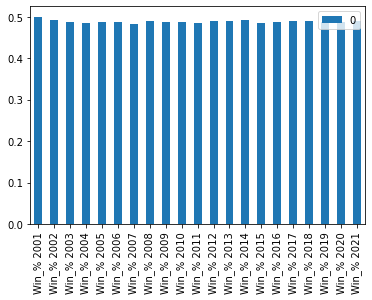

In [15]:
print("Mean Team Winning % over the last 20 years")
WLD2.plot(kind='bar')

In [16]:
WLD['Total'] = (WLD['Win_% 2001'] + WLD['Win_% 2002'] + WLD['Win_% 2003'] + WLD['Win_% 2004'] + WLD['Win_% 2005']
               + WLD['Win_% 2006'] + WLD['Win_% 2007'] + WLD['Win_% 2008'] + WLD['Win_% 2009'] + WLD['Win_% 2010']
               + WLD['Win_% 2011'] + WLD['Win_% 2012'] + WLD['Win_% 2013'] + WLD['Win_% 2014'] + WLD['Win_% 2015']
               + WLD['Win_% 2016'] + WLD['Win_% 2017'] + WLD['Win_% 2018'] + WLD['Win_% 2019'] + WLD['Win_% 2020']
               + WLD['Win_% 2021'])

WLD['Average'] = (WLD['Total']) / 21
WLD['WLDRank'] = WLD['Average'].rank(ascending=True).astype(float)
WLD['WLD_Value'] = (((WLD['WLDRank']) / len(WLD))) * 15
print("WLD = Win-Loss Data over the last 21 years")
WLD.head()

WLD = Win-Loss Data over the last 21 years


,Team,Win_% 2001,Win_% 2002,Win_% 2003,Win_% 2004,Win_% 2005,Win_% 2006,Win_% 2007,Win_% 2008,Win_% 2009,Win_% 2010,Win_% 2011,Win_% 2012,Win_% 2013,Win_% 2014,Win_% 2015,Win_% 2016,Win_% 2017,Win_% 2018,Win_% 2019,Win_% 2020,Win_% 2021,Team_Name,Total,Average,WLDRank,WLD_Value
0,Detroit Lions Lions,0.063,0.125,0.250,0.125,0.125,0.125,0.063,0.000,0.063,0.125,0.125,0.125,0.125,0.125,0.188,0.063,0.000,0.188,0.125,0.063,0.206,Detroit Lions,2.397,0.114,1.000,0.484
1,Jacksonville Jaguars Jaguars,0.125,0.188,0.250,0.250,0.188,0.188,0.188,0.125,0.125,0.250,0.125,0.125,0.188,0.125,0.188,0.125,0.188,0.250,0.219,0.125,0.176,Jacksonville Jaguars,3.711,0.177,2.000,0.968
2,Houston Texans Texans,0.188,0.250,0.250,0.250,0.250,0.250,0.250,0.125,0.188,0.250,0.188,0.250,0.250,0.188,0.250,0.188,0.250,0.250,0.188,0.250,0.235,Houston Texans,4.738,0.226,3.000,1.452
3,New York Giants Giants,0.313,0.250,0.250,0.313,0.250,0.250,0.250,0.281,0.250,0.250,0.250,0.250,0.250,0.188,0.250,0.188,0.250,0.250,0.250,0.281,0.235,New York Giants,5.299,0.252,4.000,1.935
4,New York Jets Jets,0.313,0.313,0.313,0.313,0.250,0.313,0.250,0.250,0.250,0.313,0.250,0.250,0.250,0.250,0.313,0.250,0.313,0.313,0.344,0.250,0.235,New York Jets,5.896,0.281,5.000,2.419


Average Winning Record per NFL Team: 2001-2021


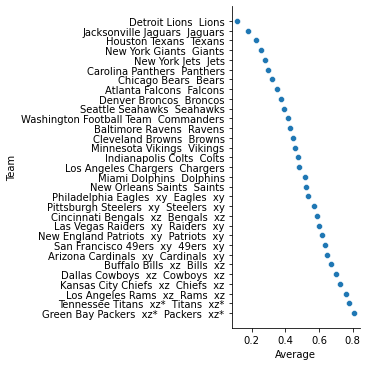

In [17]:
print("Average Winning Record per NFL Team: 2001-2021")
sns.relplot(data=WLD, x="Average", y="Team")



In [18]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums"
table_class="wikitable sortable plainrowheaders jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})

df=pd.read_html(str(indiatable))
# convert list to dataframe
SIS_2021=pd.DataFrame(df[0])
SIS_2021.head()



200


,Image,Name,Capacity,Location,Surface,Roof type,Team(s),Opened,Ref(s)
0,NaN,Allegiant Stadium,65000,"Paradise, Nevada",Bermuda grass,Fixed,Las Vegas Raiders,2020,[3]
1,NaN,GEHA Field at Arrowhead Stadium,76416,"Kansas City, Missouri",Bermuda grass,Open,Kansas City Chiefs,1972,[4]
2,NaN,AT&T Stadium,80000,"Arlington, Texas",Hellas Matrix Turf,Retractable,Dallas Cowboys,2009,[5][6]
3,NaN,Bank of America Stadium,75523,"Charlotte, North Carolina",FieldTurf,Open,Carolina Panthers,1996,[7]
4,NaN,Caesars Superdome,73208,"New Orleans, Louisiana",FieldTurf Revolution 360[8],Fixed,New Orleans Saints,1975,[9]


In [19]:
SI_2021 = pd.DataFrame(None, columns=['Stadium_Name', 'Capacity', 'Stadium_Location','Team_City', 'Team_State', 'Field_Type', 'Roof_Type', 'Team_Name', 'Opened' ])
SI_2021['Stadium_Name'] = SIS_2021['Name']
SI_2021['Capacity'] = SIS_2021['Capacity']
SI_2021['Stadium_Location'] = SIS_2021['Location']

SI_2021[['Team_City','Team_State']] = SIS_2021['Location'].str.split(",",expand=True)

SI_2021['Field_Type'] = SIS_2021['Surface']
SI_2021['Roof_Type'] = SIS_2021['Roof type']
SI_2021['Team_Name'] = SIS_2021['Team(s)']
SI_2021['Opened'] = SIS_2021['Opened']
SI_2021.head()

,Stadium_Name,Capacity,Stadium_Location,Team_City,Team_State,Field_Type,Roof_Type,Team_Name,Opened
0,Allegiant Stadium,65000,"Paradise, Nevada",Paradise,Nevada,Bermuda grass,Fixed,Las Vegas Raiders,2020
1,GEHA Field at Arrowhead Stadium,76416,"Kansas City, Missouri",Kansas City,Missouri,Bermuda grass,Open,Kansas City Chiefs,1972
2,AT&T Stadium,80000,"Arlington, Texas",Arlington,Texas,Hellas Matrix Turf,Retractable,Dallas Cowboys,2009
3,Bank of America Stadium,75523,"Charlotte, North Carolina",Charlotte,North Carolina,FieldTurf,Open,Carolina Panthers,1996
4,Caesars Superdome,73208,"New Orleans, Louisiana",New Orleans,Louisiana,FieldTurf Revolution 360[8],Fixed,New Orleans Saints,1975


In [20]:
#TODO: Web scrape to pull NFL 2021 season stats into a table

ALL_TEAM_2021 = pd.read_html("https://www.nfl.com/stats/team-stats/")

print("Team Stats")
print()
TEAM_2021 = pd.concat(ALL_TEAM_2021)
TEAM_2021['Team_O'] = TEAM_2021['Team'].str.extract(r'\b(\w+)$', expand = True)

TEAM_2021 = TEAM_2021.iloc[: , 1:]

TEAM_2021.head()

Team Stats



,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,Team_O
0,550,356,64.700,6.800,3746,21,15,85.800,181,32.900,42,7,73T,43,305,Team
1,731,492,67.300,7.400,5383,43,12,101.600,273,37.300,76,10,62T,23,154,Buccaneers
2,495,324,65.500,7.700,3815,30,7,103.100,166,33.500,56,12,84T,46,383,Seahawks
3,514,343,66.700,8.600,4437,26,14,99.200,200,38.900,63,11,83,33,216,49ers
4,674,443,65.700,7.400,5014,38,15,97.400,256,38.000,53,15,72T,31,214,Chargers


In [21]:
mat1 = []
mat2 = []
p = []
list1 = TEAM_2021['Team_O'].tolist()
list2 = TNA_2021['Team_Name'].tolist()
threshold = 100

for i in list1:
    mat1.append(process.extractOne(
      i, list2, scorer=fuzz.token_set_ratio))
TEAM_2021['matches'] = mat1

for j in TEAM_2021['matches']:
    if j[1] >= threshold:
        p.append(j[0])
    mat2.append(",".join(p))
    p = []

TEAM_2021['matches'] = mat2
TEAM_2021.rename(columns = {'matches' : 'Team_Name'}, inplace=True)

TEAM_2021.head()

,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,Team_O,Team_Name
0,550,356,64.700,6.800,3746,21,15,85.800,181,32.900,42,7,73T,43,305,Team,Washington Football Team
1,731,492,67.300,7.400,5383,43,12,101.600,273,37.300,76,10,62T,23,154,Buccaneers,Tampa Bay Buccaneers
2,495,324,65.500,7.700,3815,30,7,103.100,166,33.500,56,12,84T,46,383,Seahawks,Seattle Seahawks
3,514,343,66.700,8.600,4437,26,14,99.200,200,38.900,63,11,83,33,216,49ers,San Francisco 49ers
4,674,443,65.700,7.400,5014,38,15,97.400,256,38.000,53,15,72T,31,214,Chargers,Los Angeles Chargers


In [22]:
#TODO: Web scrape to pull NFL Team Valuations

Team_Value = pd.read_html("https://www.thephinsider.com/2014/6/10/5796114/purchase-price-and-current-value-of-each-nfl-franchise")

print("2014 Team Value Stats")
print()
value = pd.concat(Team_Value)
value.columns =['Team_Name', 'Team_Owner', 'Sale_Year', 'Sale_Price', 'Adj_for_Inflation', 'Value_2014']
value.drop(index=value.index[0], 
        axis=0, 
        inplace=True)
value['Sale_Price'] = value['Sale_Price'].replace({'\$': '', ',': ''}, regex=True)
value['Adj_for_Inflation'] = value['Adj_for_Inflation'].replace({'\$': '', ',': ''}, regex=True)
value['Value_2014'] = value['Value_2014'].replace({'\$': '', ',': ''}, regex=True).astype(float)
value['Rank2014'] = value['Value_2014'].rank(ascending=True)
value.head()

2014 Team Value Stats



,Team_Name,Team_Owner,Sale_Year,Sale_Price,Adj_for_Inflation,Value_2014,Rank2014
1,Arizona Cardinals,William Bidwill,1932,50000.00,847000000.00,961000000.000,9.000
2,Atlanta Falcons,Arthur Blank,2002,545000000.00,708712613.78,933000000.000,7.000
3,Baltimore Ravens,Stephen Bisciotti,2004,600000000.00,742574257.43,1227000000.000,24.000
4,Buffalo Bills,Ralph Wilson Trust,1959,25000.00,201612.90,870000000.000,3.000
5,Carolina Panthers,Jerry Richardson,1993,206000000.00,333333333.33,1057000000.000,15.000


In [23]:
#TODO: Web scrape to pull grid coordinates for NFL stadiums into a table

NFL_Lat_Long = pd.read_html("https://github.com/Sinbad311/CloudProject/blob/master/NFL%20Stadium%20Latitude%20and%20Longtitude.csv")

print("NFL Stadium Lat/Long")
print()
Lat_Long = pd.concat(NFL_Lat_Long)
Lat_Long.drop(Lat_Long.columns[[0, 6, 7]], axis = 1, inplace = True)
Lat_Long.head()

NFL Stadium Lat/Long



,Team,Conference,latitude,longitude,zip
0,Titans,AFC,36.166,-86.771,37213
1,Giants,NFC,40.812,-74.077,10021
2,Steelers,AFC,40.447,-80.016,15202
3,Panthers,NFC,35.226,-80.853,28202
4,Ravens,AFC,39.278,-76.623,21203


In [24]:
#TODO: Web scrape to pull in the top Market Values for NFL players into a table

NFL_PValue = pd.read_html("https://www.spotrac.com/nfl/market-value/")

print("Top NFL (Player) Market Value")
print()
PValue = pd.concat(NFL_PValue)
PValue['Value'] = PValue['Value'].replace({'\$': '', ',': ''}, regex=True).astype(float)
PValue['Average'] = PValue['Average'].replace({'\$': '', ',': ''}, regex=True).astype(float)
PValue.head()

Top NFL (Player) Market Value



,Player (162),Team,Pos.,Age,Length,Value,Average,Free Agent
0,Aaron Rodgers,GB,QB,38,3,139105833.000,46368611.000,2024
1,Tom Brady,TB,QB,44,1,44090826.000,44090826.000,2020
2,Lamar Jackson,BAL,QB,25,4,172502176.000,43125544.000,2023
3,Kyler Murray,ARI,QB,24,6,258052422.000,43008737.000,2024
4,Russell Wilson,SEA,QB,33,3,127821825.000,42607275.000,2024


In [25]:
TPValue = PValue.groupby(['Team']).agg({'Average': ['sum']}).rank(ascending=True)
TPValue.columns = ['AvgVal']
TPValue = TPValue.reset_index()

TPValue['TPRK'] = TPValue['AvgVal'].rank(ascending=True)
TPValue['TPRK'] = TPValue['TPRK'].astype(float)
TPValue['TPRK_Value'] = (((TPValue['TPRK']) / 32)) * 10
TPValue.head()

,Team,AvgVal,TPRK,TPRK_Value
0,ARI,27.000,27.000,8.438
1,ATL,9.000,9.000,2.812
2,BAL,22.000,22.000,6.875
3,BUF,20.000,20.000,6.250
4,CAR,5.000,5.000,1.562


In [26]:
#TODO: Web scrape to pull NFL 2021 season player fine stats into a table

NFL_PFines = pd.read_html("https://www.spotrac.com/nfl/fines-suspensions/2021/")

print("Fines for 2021 by NFL Player")
print()
PFines = pd.concat(NFL_PFines)
PFines['Amount'] = PFines['Amount'].replace({'\$': '', ',': ''}, regex=True).astype(float)
PFines = PFines.drop(PFines.tail(1).index)
PFines = PFines.sort_values(by=['Amount'], ascending=False)
PFines.head()

Fines for 2021 by NFL Player



,Player,Pos.,Team,Amount,Infraction,Week
135,A.J. Bouye,CB,DEN,1591912.000,PED,NaN
152,David Onyemata,DT,NO,1163333.380,PEDs,NaN
132,La'el Collins,RT,DAL,455880.000,Substance Abuse,NaN
107,Gerald McCoy,DT,LV,416666.660,PEDs,NaN
154,Jordan Willis,DE,SF,349410.000,PEDs,NaN


In [27]:
#TODO: Web scrape to pull NFL 2021 season payroll stats into a table
#TODO: Review teams with the lowest and highest payrolls (total) by rank.

NFL_Payroll = pd.read_html("https://www.spotrac.com/nfl/positional/breakdown/")

print("Team Payroll per Position")
print()
Payroll = pd.concat(NFL_Payroll)
Payroll['TRank'] = Payroll['Total'].rank()
Payroll = Payroll.sort_values(by=['TRank'], ascending=False)
Payroll['Total'] = Payroll['Total'].replace({'M': ''}, regex=True).astype(float)
Payroll['QB'] = Payroll['QB'].replace({'M': ''}, regex=True).astype(float)
Payroll['RB/FB'] = Payroll['RB/FB'].replace({'M': ''}, regex=True).astype(float)
Payroll['WR'] = Payroll['WR'].replace({'M': ''}, regex=True).astype(float)
Payroll['TE'] = Payroll['TE'].replace({'M': ''}, regex=True).astype(float)
Payroll['OL'] = Payroll['OL'].replace({'M': ''}, regex=True).astype(float)
Payroll['DL'] = Payroll['DL'].replace({'M': ''}, regex=True).astype(float)
Payroll['LB'] = Payroll['LB'].replace({'M': ''}, regex=True).astype(float)
Payroll['DB'] = Payroll['DB'].replace({'M': ''}, regex=True).astype(float)
Payroll['K/P/LS'] = Payroll['K/P/LS'].replace({'M': ''}, regex=True).astype(float)
Payroll = Payroll.fillna(0)

Payroll['Total'] = Payroll['Total'] * 1000000
Payroll['QB'] = Payroll['QB'] * 1000000
Payroll['RB/FB'] = Payroll['RB/FB'] * 1000000
Payroll['WR'] = Payroll['WR'] * 1000000
Payroll['TE'] = Payroll['TE'] * 1000000
Payroll['OL'] = Payroll['OL'] * 1000000
Payroll['DL'] = Payroll['DL'] * 1000000
Payroll['LB'] = Payroll['LB'] * 1000000
Payroll['DB'] = Payroll['DB'] * 1000000
Payroll['K/P/LS'] = Payroll['K/P/LS'] * 1000000

Payroll['Off_Total'] = (Payroll['QB'] + Payroll['RB/FB'] + Payroll['WR'] + Payroll['TE'] + Payroll['OL'])
Payroll['DST_Total'] = (Payroll['DL'] + Payroll['LB'] + Payroll['DB'] + Payroll['K/P/LS'])


Payroll.head()

Team Payroll per Position



,Team,Players,QB,RB/FB,WR,TE,OL,DL,LB,DB,K/P/LS,Total,TRank,Off_Total,DST_Total
22,New Orleans Saints,57.000,17200000.000,19300000.000,18900000.000,5900000.000,51600000.000,53900000.000,16400000.000,59300000.000,7700000.000,250000000.000,33.000,112900000.000,137300000.000
11,Green Bay Packers,52.000,51500000.000,9000000.000,13100000.000,5400000.000,31600000.000,21400000.000,55200000.000,37500000.000,7100000.000,231800000.000,32.000,110600000.000,121200000.000
8,Dallas Cowboys,58.000,37300000.000,23600000.000,29200000.000,7500000.000,61000000.000,37500000.000,7900000.000,22200000.000,4300000.000,231200000.000,31.000,158600000.000,71900000.000
17,Los Angeles Rams,60.000,23800000.000,6200000.000,40000000.000,11700000.000,36800000.000,44800000.000,23200000.000,35600000.000,4200000.000,226300000.000,30.000,118500000.000,107800000.000
20,Minnesota Vikings,57.000,47000000.000,18200000.000,26400000.000,3600000.000,22400000.000,53700000.000,28200000.000,20200000.000,1000000.000,220700000.000,29.000,117600000.000,103100000.000


In [28]:
Payroll2 = pd.DataFrame()
Payroll2['Team_Name'] = Payroll['Team']

Payroll2['QB%'] = (Payroll['QB'] / Payroll['Total']) * 100
Payroll2['RB/FB%'] = (Payroll['RB/FB'] / Payroll['Total']) * 100
Payroll2['WR%'] = (Payroll['WR'].astype(float) / Payroll['Total']) * 100
Payroll2['TE'] = (Payroll['TE'].astype(float) / Payroll['Total']) * 100
Payroll2['OL%'] = (Payroll['OL'].astype(float) / Payroll['Total']) * 100
Payroll2['DL%'] = (Payroll['DL'].astype(float) / Payroll['Total']) * 100
Payroll2['DB%'] = (Payroll['DB'].astype(float) / Payroll['Total']) * 100
Payroll2['K/P/LS%'] = (Payroll['K/P/LS'].astype(float) / Payroll['Total']) * 100
Payroll2['Off_Total%'] = (Payroll['Off_Total'].astype(float) / Payroll['Total']) * 100
Payroll2['DST_Total%'] = (Payroll['DST_Total'].astype(float) / Payroll['Total']) * 100

Payroll2.head()

,Team_Name,QB%,RB/FB%,WR%,TE,OL%,DL%,DB%,K/P/LS%,Off_Total%,DST_Total%
22,New Orleans Saints,6.880,7.720,7.560,2.360,20.640,21.560,23.720,3.080,45.160,54.920
11,Green Bay Packers,22.217,3.883,5.651,2.330,13.632,9.232,16.178,3.063,47.714,52.286
8,Dallas Cowboys,16.133,10.208,12.630,3.244,26.384,16.220,9.602,1.860,68.599,31.099
17,Los Angeles Rams,10.517,2.740,17.676,5.170,16.262,19.797,15.731,1.856,52.364,47.636
20,Minnesota Vikings,21.296,8.246,11.962,1.631,10.150,24.332,9.153,0.453,53.285,46.715


<AxesSubplot:title={'center':'Payroll Percentage: Offense vs. Defense & ST'}, xlabel='Team_Name'>

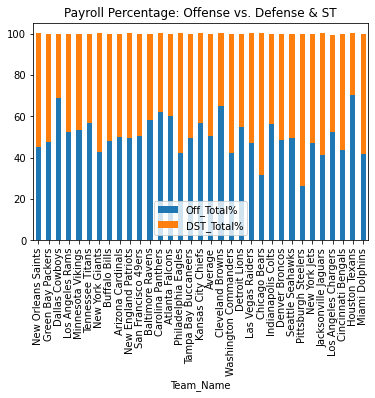

In [29]:
Payroll2[["Off_Total%", "DST_Total%", "Team_Name"]].plot(x='Team_Name'
                                                             , kind='bar', title='Payroll Percentage: Offense vs. Defense & ST', stacked=True)


In [30]:
#TODO: Establish a baseline for a strategy for ideal payroll

PMaxT = Payroll['QB'].max() + Payroll['RB/FB'].max() + Payroll['TE'].max() + Payroll['OL'].max() + Payroll['DL'].max() + Payroll['LB'].max() + Payroll['DB'].max() + Payroll['K/P/LS'].max()
PMaxT = "{:.2f}".format(PMaxT)
print("Maximum Team Payroll (in millions): " + str(PMaxT))
print()
PMeanT = Payroll['QB'].mean() + Payroll['RB/FB'].mean() + Payroll['TE'].mean() + Payroll['OL'].mean() + Payroll['DL'].mean() + Payroll['LB'].mean() + Payroll['DB'].mean() + Payroll['K/P/LS'].mean()
PMeanT = "{:.2f}".format(PMeanT)
print("Average Team Payroll (in millions): " + str(PMeanT))
print()
PMinT = Payroll['QB'].min() + Payroll['RB/FB'].min() + Payroll['TE'].min() + Payroll['OL'].min() + Payroll['DL'].min() + Payroll['LB'].min() + Payroll['DB'].min() + Payroll['K/P/LS'].min()
PMinT = "{:.2f}".format(PMinT)
print("Minimum Team Payroll (in millions): " + str(PMinT))
TRange = ((Payroll['QB'].max() + Payroll['RB/FB'].max() + Payroll['TE'].max() + Payroll['OL'].max() + Payroll['DL'].max() + Payroll['LB'].max() + Payroll['DB'].max() + Payroll['K/P/LS'].max()) + (Payroll['QB'].mean() + Payroll['RB/FB'].mean() + Payroll['TE'].mean() + Payroll['OL'].mean() + Payroll['DL'].mean() + Payroll['LB'].mean() + Payroll['DB'].mean() + Payroll['K/P/LS'].mean()))/2
TRange = "{:.2f}".format(TRange)
print()
print("Ideal Range for Payroll (in millions): " + str(TRange))
print("Ideal payroll is based on the mean of the max possible payroll and average payroll per position")

Maximum Team Payroll (in millions): 370000000.00

Average Team Payroll (in millions): 171048484.85

Minimum Team Payroll (in millions): 39100000.00

Ideal Range for Payroll (in millions): 270524242.42
Ideal payroll is based on the mean of the max possible payroll and average payroll per position


In [31]:
NFL_Franschise = pd.read_html("https://www.statista.com/statistics/193534/franchise-value-of-national-football-league-teams-in-2010/")

print("Franchise value of National Football League teams in 2021")
print()
Franchise = pd.concat(NFL_Franschise)
Franchise.drop(Franchise.columns[[0, 1, 2, 3]], axis = 1, inplace = True)
Franchise.columns =['Team_Name', 'Value(M)']
Franchise = Franchise.dropna()
Franchise['Value_2021'] = Franchise['Value(M)'] * 1000000
Franchise['Value_2021'] = Franchise['Value_2021'].astype(float) 
Franchise['Rank2021'] = Franchise['Value(M)'].rank(ascending=True)
Franchise.head()

Franchise value of National Football League teams in 2021



,Team_Name,Value(M),Value_2021,Rank2021
0,Dallas Cowboys,6500.000,6500000000.000,32.000
1,New England Patriots,5000.000,5000000000.000,31.000
2,New York Giants,4850.000,4850000000.000,30.000
3,Los Angeles Rams,4800.000,4800000000.000,29.000
4,Washington Football Team,4200.000,4200000000.000,28.000


Now that the data is imported into there seperate DataFrames, it is time to start processing the data and getting it organized

In [32]:
#TODO: Merge all three player tables with outer joins to include all players from all three lists.
player = pd.merge(APT_2021, RZRA_2021, on=['Player Name'], how='outer')
df_player = pd.merge(player, RZT_2021, on=['Player Name'], how='outer')

#TODO: Replace any 'NaN' fields [Use 999 if no rank and 0 if no stats].
df_player['APTRank#'] = df_player['APTRank#'].fillna(999)
df_player['Compl'] = df_player['Compl'].fillna(0)
df_player['Targeted'] = df_player['Targeted'].fillna(0)
df_player['Compl%'] = df_player['Compl%'].fillna(0)
df_player['TD#'] = df_player['TD#'].fillna(0)

df_player['RZRARank#'] = df_player['RZRARank#'].fillna(999)
df_player['RZRRush#'] = df_player['RZRRush#'].fillna(0)
df_player['RZRTD#'] = df_player['RZRTD#'].fillna(0)

df_player['RZTRank#'] = df_player['RZTRank#'].fillna(999)
df_player['RZCompl'] = df_player['RZCompl'].fillna(0)
df_player['RZTargeted'] = df_player['RZTargeted'].fillna(0)
df_player['RZCompl%'] = df_player['RZCompl%'].fillna(0)
df_player['RZTD#'] = df_player['RZTD#'].fillna(0)

df_player['PRank#'] = (df_player['APTRank#'] + df_player['RZRARank#'] + df_player['RZTRank#']) / 3
df_player['PRank#'] = df_player['PRank#'].round(decimals=2)
ORank = df_player.pop('PRank#')
df_player.insert(0, 'PRank#', ORank)

#TODO: Determine teams with best offensive weapons

df_player = df_player.sort_values('PRank#')
df_player['Team_Abb'] = df_player['Team_A_y'].fillna(df_player['Team_A_x'].fillna(df_player['Team_A']))
df_player['Team_Pos'] = df_player['Position_y'].fillna(df_player['Position_x'].fillna(df_player['Position']))
df_player = pd.merge(left=df_player, right=TNA_2021, left_on='Team_Abb', right_on='Team_A')
df_player.head()

,PRank#,APTRank#,Player Name,Team_A_x,Position_x,Compl,Targeted,Compl%,TD#,RZRARank#,Team_A_y,Position_y,RZRRush#,RZRTD#,RZTRank#,Team_A_x,Position,RZCompl,RZTargeted,RZCompl%,RZTD#,Team_Abb,Team_Pos,Team_A_y,Team_O,Team_Name
0,20.330,44.000,Leonard Fournette,TB,RB,71.000,86.000,82.560,2.000,4.000,TB,RB,43.000,6.000,13.000,TB,RB,13.000,19.000,68.420,2.000,TB,RB,TB,TB,Tampa Bay Buccaneers
1,61.000,11.000,Chris Godwin,TB,WR,101.000,131.000,77.100,5.000,167.000,TB,WR,1.000,1.000,5.000,TB,WR,20.000,27.000,74.070,5.000,TB,WR,TB,TB,Tampa Bay Buccaneers
2,171.000,198.000,Giovani Bernard,TB,RB,23.000,29.000,79.310,3.000,196.000,TB,RB,1.000,0.000,119.000,TB,RB,4.000,8.000,50.000,3.000,TB,RB,TB,TB,Tampa Bay Buccaneers
3,241.670,282.000,Ronald Jones,TB,RB,10.000,14.000,71.430,0.000,59.000,TB,RB,12.000,4.000,384.000,TB,RB,0.000,1.000,0.000,0.000,TB,RB,TB,TB,Tampa Bay Buccaneers
4,348.670,30.000,Mike Evans,TB,WR,65.000,103.000,63.110,11.000,999.000,NaN,NaN,0.000,0.000,17.000,TB,WR,11.000,18.000,61.110,7.000,TB,WR,TB,TB,Tampa Bay Buccaneers


In [33]:
team_df_player1 = df_player.groupby(['Team_Name']).agg('mean')
team_df_player1['TPRK#'] = team_df_player1['PRank#'].rank(ascending=False)
team_df_player1 = team_df_player1.sort_values(by=['TPRK#'], ascending=False)
team_df_player1['TPRK#'] = team_df_player1['TPRK#'].astype(float)
team_df_player1['TOPRK_Value'] = ((team_df_player1['TPRK#']) / len(team_df_player1)) * 5

team_df_player1.head()

,PRank#,APTRank#,Compl,Targeted,Compl%,TD#,RZRARank#,RZRRush#,RZRTD#,RZTRank#,RZCompl,RZTargeted,RZCompl%,RZTD#,TPRK#,TOPRK_Value
Team_Name,,,,,,,,,,,,,,,,
New England Patriots,346.769,271.923,24.462,34.923,68.695,1.615,448.692,5.846,1.154,319.692,3.231,5.308,52.076,1.154,27.000,5.000
Buffalo Bills,369.499,299.786,27.857,40.643,58.019,2.571,542.429,5.786,0.929,266.286,5.286,8.714,49.227,2.071,26.000,4.815
Dallas Cowboys,392.511,256.067,27.800,40.200,68.549,2.333,694.200,4.467,0.800,227.267,4.333,6.800,69.072,1.667,25.000,4.630
New York Jets,395.315,257.556,16.944,27.056,56.594,1.056,649.222,2.333,0.333,279.167,2.556,4.000,52.704,0.833,24.000,4.444
Atlanta Falcons,408.381,253.714,24.714,36.143,62.994,1.357,676.214,3.500,0.643,295.214,3.571,6.143,44.860,1.214,23.000,4.259


Text(0.5, 1.0, 'Mean Player Ranking per NFL Team in 2021')

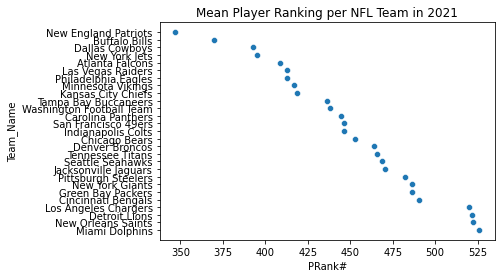

In [34]:
ax = sns.scatterplot(y="Team_Name", x="PRank#", data=team_df_player1)
ax.set_title("Mean Player Ranking per NFL Team in 2021")

Text(0.5, 1.0, 'Mean Position Ranking per NFL Team in 2021')

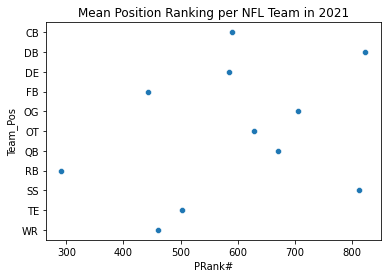

In [35]:
team_df_player2 = df_player.groupby(['Team_Pos']).agg('mean')
ax = sns.scatterplot(y="Team_Pos", x="PRank#", data=team_df_player2)
ax.set_title("Mean Position Ranking per NFL Team in 2021")

In [36]:
Att_2021 = fuzzy_merge(Att_2021, TNA_2021, 'Team_City', 'Team_Name', threshold=50)
Att_2021.rename(columns = {'matches' : 'Team_Name'}, inplace=True)

SI_Map_2021 = fuzzy_merge(Lat_Long, TNA_2021, 'Team', 'Team_Name', threshold=80)
SI_Map_2021.rename(columns = {'matches' : 'Team_Name'}, inplace=True)

df_combo = fuzzy_merge(Att_2021, Lat_Long, 'Team_City', 'Team', threshold=80)
df_combo.rename(columns = {'matches' : 'Team'}, inplace=True)
df_combo = df_combo.drop('Team_Name', 1)

SI_Map_2021 = SI_Map_2021.T.drop_duplicates().T
SI_Map_2021.head()

,Team,Conference,latitude,longitude,zip,Team_Name
0,Titans,AFC,36.166,-86.771,37213,Tennessee Titans
1,Giants,NFC,40.812,-74.077,10021,New York Giants
2,Steelers,AFC,40.447,-80.016,15202,Pittsburgh Steelers
3,Panthers,NFC,35.226,-80.853,28202,Carolina Panthers
4,Ravens,AFC,39.278,-76.623,21203,Baltimore Ravens


In [37]:
#TODO: Determine teams with lowest and highest player market values
PValue = PValue.replace(np.nan, 0)

TValue = PValue.groupby('Team')['Average'].agg(['sum', 'count', 'max', 'min'])
TValue['SumRank'] = TValue['sum'].rank(ascending=False)
TValue = TValue.sort_values(by=['sum'], ascending=True)
TValue.head()

,sum,count,max,min,SumRank
Team,,,,,
PHI,17103128.000,2,12847568.000,4255560.000,32.000
HOU,19626577.000,2,18159443.000,1467134.000,31.000
DET,24452455.000,3,12833094.000,2940024.000,30.000
NYG,31853852.000,3,12564695.000,6753911.000,29.000
CAR,32270248.000,2,16907455.000,15362793.000,28.000


In [38]:
#TODO: Calculate team with the least and most fines

PFines = PFines.replace(np.nan, 0)

PFines['Amount'] = PFines['Amount'].astype(float)
TFines = PFines.groupby('Team')[["Amount"]].agg(sum)

TFines['Rank'] = TFines['Amount'].rank(ascending=True)
TFines = TFines.sort_values(by=['Rank'], ascending=True)

TFines.head()

,Amount,Rank
Team,,
ATL,10300.000,1.000
NYJ,15450.000,2.000
PHI,20133.000,3.000
HOU,24256.000,4.000
IND,26589.000,5.000


<AxesSubplot:title={'center':'Total Team Fine by Team Abbreviation (M)'}, xlabel='Team'>

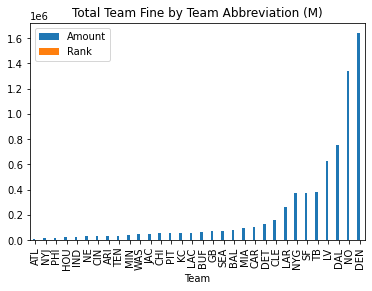

In [39]:
TFines.plot( kind='bar', title='Total Team Fine by Team Abbreviation (M)')

In [40]:
#TODO: Merge tables to find which which teams have grown in value and by how much.

print("Merge tables to find the growth in team valuations.")
print()
valuation = pd.merge(Franchise, value, on=['Team_Name'], how='inner')
valuation['Growth'] = valuation['Value_2021'].astype(float) - valuation['Value_2014'].astype(float)
valuation['Growth%'] = valuation['Growth'] / valuation['Value_2014'].astype(float)

valuation['Rank2021'] = valuation['Rank2021'].astype(float)
valuation['Val_Value'] = (((valuation['Rank2021']) / len(valuation))) * 15

valuation['GRank#'] = valuation['Growth%'].rank(ascending=False)
valuation['Growth%'] = valuation['Growth%'].astype(float)
valuation['GRank#'] = valuation['GRank#'].astype(float)
valuation['Grow_Value'] = (((valuation['GRank#']) / len(valuation))) * 5

valuation.head()

Merge tables to find the growth in team valuations.



,Team_Name,Value(M),Value_2021,Rank2021,Team_Owner,Sale_Year,Sale_Price,Adj_for_Inflation,Value_2014,Rank2014,Growth,Growth%,Val_Value,GRank#,Grow_Value
0,Dallas Cowboys,6500.000,6500000000.000,32.000,Jerry Jones,1989,150000000.00,283018867.92,2300000000.000,32.000,4200000000.000,1.826,17.143,15.000,2.679
1,New England Patriots,5000.000,5000000000.000,31.000,Robert Kraft,1994,172000000.00,271293375.39,1800000000.000,31.000,3200000000.000,1.778,16.607,17.000,3.036
2,New York Giants,4850.000,4850000000.000,30.000,John Mara/Steve Tisch,1929,500.00,6849.32,1550000000.000,29.000,3300000000.000,2.129,16.071,9.000,1.607
3,San Francisco 49ers,4175.000,4175000000.000,27.000,Jed York,1977,13000000.00,50193050.19,1224000000.000,23.000,2951000000.000,2.411,14.464,2.000,0.357
4,Chicago Bears,4075.000,4075000000.000,26.000,McCaskey Family,1920,100.00,1162.79,1252000000.000,25.000,2823000000.000,2.255,13.929,5.000,0.893


In [41]:
SI2_2021 = (pd.merge(SI_Map_2021, SI_2021, on='Team_Name'))
SI2_2021.head()

,Team,Conference,latitude,longitude,zip,Team_Name,Stadium_Name,Capacity,Stadium_Location,Team_City,Team_State,Field_Type,Roof_Type,Opened
0,Titans,AFC,36.166,-86.771,37213,Tennessee Titans,Nissan Stadium,69143,"Nashville, Tennessee",Nashville,Tennessee,Bermuda grass,Open,1999
1,Steelers,AFC,40.447,-80.016,15202,Pittsburgh Steelers,Heinz Field,68400,"Pittsburgh, Pennsylvania",Pittsburgh,Pennsylvania,Kentucky bluegrass,Open,2001
2,Panthers,NFC,35.226,-80.853,28202,Carolina Panthers,Bank of America Stadium,75523,"Charlotte, North Carolina",Charlotte,North Carolina,FieldTurf,Open,1996
3,Ravens,AFC,39.278,-76.623,21203,Baltimore Ravens,M&T Bank Stadium,71008,"Baltimore, Maryland",Baltimore,Maryland,Bermuda grass[26],Open,1998
4,Buccaneers,NFC,27.976,-82.503,33607,Tampa Bay Buccaneers,Raymond James Stadium,65890,"Tampa, Florida",Tampa,Florida,Bermuda grass,Open,1998


Stadium Locations without a map


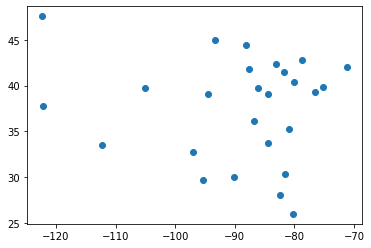

In [42]:
print("Stadium Locations without a map")
plt.scatter(x=SI2_2021['longitude'], y=SI2_2021['latitude'])
plt.show()

In [43]:
from ipyleaflet import Map
from ipyleaflet import basemaps
from ipyleaflet import Marker
m = Map(center=(39,-98), zoom=4, basemap = basemaps.Esri.WorldStreetMap)

for name, lon, lat in SI2_2021[["Team", "longitude", "latitude"]].values:
    marker = Marker(location=(lat, lon), draggable=False, title=name, alt=name)
    m.add_layer(marker)

m.layout.height="550px"
print("Stadium Locations Based on U.S. Map")

m

Stadium Locations Based on U.S. Map


Map(center=[39, -98], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

Now that the data has been sorted and processed it is time to start putting that infromation into some graphics

In [44]:
#TODO: Teams with the lowest lost in fines.

TFines['Rank'] = TFines['Rank'].astype(float)
TFines['R_Value'] = ((TFines['Rank']) / (len(TFines))) * -5
TFines.head()

,Amount,Rank,R_Value
Team,,,
ATL,10300.000,1.000,-0.156
NYJ,15450.000,2.000,-0.312
PHI,20133.000,3.000,-0.469
HOU,24256.000,4.000,-0.625
IND,26589.000,5.000,-0.781


Correlation of Position Value to Finding the right team payroll composition

The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation

The correclation reflects the relationship between players being fined and the team's total fines.


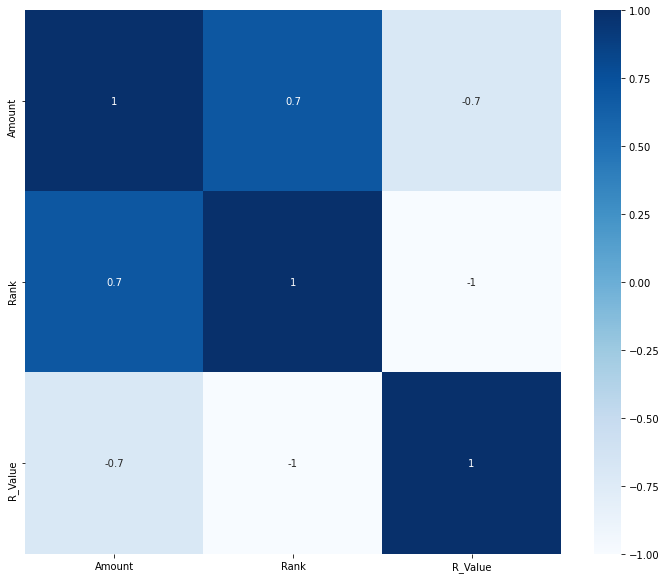

In [45]:
print("Correlation of Position Value to Finding the right team payroll composition")
print()
print("The correlation coefficient has values between -1 to 1")
print("— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)")
print("— A value closer to 1 implies stronger positive correlation")
print("— A value closer to -1 implies stronger negative correlation")
print()
print("The correclation reflects the relationship between players being fined and the team's total fines.")
plt.figure(figsize=(12,10))
cor = TFines.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [46]:
#TODO: Calculate projected ticket sales based on NFL 2021 average - $107.50/ticket.
df_combo = df_combo.sort_values(by=['ORAvg'], ascending=True)
df_combo['TSales'] = df_combo['H_Total'].astype(float) * 107.50

df_combo = df_combo.sort_values(by=['TSales'], ascending=False)
df_combo['TSR#'] = df_combo['TSales'].rank(ascending=True)

df_combo['TSR#'] = df_combo['TSR#'].astype(float)
df_combo['TSR_Value'] = (((df_combo['TSR#']) / len(df_combo))) * 15
df_combo = df_combo.drop(['Team'], axis=1)
df_combo.head()

,AttRank#,Team_City,H_Games,H_Total,H_Avg,H_Pct%,R_Games,R_Total,R_Avg,R_Pct%,O_Games,O_Total,O_Avg,O_Pct%,ORank1,ORank2,ORank3,ORAvg,TSales,TSR#,TSR_Value
2,1,Dallas,8,747368,93421,93.4,9,619498,68833,95.3,17,1366866,80403,94.3,1.000,1.000,20.000,7.330,80342060.000,32.000,15.000
4,3,Denver,9,686129,76236,100.1,8,557752,69719,93.6,17,1243881,73169,97.1,2.000,2.000,8.000,4.000,73758867.500,31.000,14.531
6,5,Kansas City,9,659044,73227,100.4,8,533901,66737,93.7,17,1192945,70173,97.3,5.000,5.000,6.000,5.330,70847230.000,30.000,14.062
8,7,NY Jets,9,645092,71676,86.9,8,528091,66011,96.2,17,1173183,69010,90.8,10.000,10.000,30.000,16.670,69347390.000,29.000,13.594
10,9,Baltimore,9,634840,70537,99.7,8,506317,63289,95.0,17,1141157,67126,97.5,15.000,15.000,5.000,11.670,68245300.000,28.000,13.125


In [47]:
mat1 = []
mat2 = []
p = []
list1 = df_combo['Team_City'].tolist()
list2 = TNA_2021['Team_Name'].tolist()
threshold = 100

for i in list1:
    mat1.append(process.extractOne(
      i, list2, scorer=fuzz.token_set_ratio))
df_combo['matches'] = mat1

for j in df_combo['matches']:
    if j[1] >= threshold:
        p.append(j[0])
    mat2.append(",".join(p))
    p = []

df_combo['matches'] = mat2
df_combo.rename(columns = {'matches' : 'Team_Name'}, inplace=True)
df_combo =df_combo.replace(r'^s*$', float('NaN'), regex = True)
df_combo.head()

,AttRank#,Team_City,H_Games,H_Total,H_Avg,H_Pct%,R_Games,R_Total,R_Avg,R_Pct%,O_Games,O_Total,O_Avg,O_Pct%,ORank1,ORank2,ORank3,ORAvg,TSales,TSR#,TSR_Value,Team_Name
2,1,Dallas,8,747368,93421,93.4,9,619498,68833,95.3,17,1366866,80403,94.3,1.000,1.000,20.000,7.330,80342060.000,32.000,15.000,Dallas Cowboys
4,3,Denver,9,686129,76236,100.1,8,557752,69719,93.6,17,1243881,73169,97.1,2.000,2.000,8.000,4.000,73758867.500,31.000,14.531,Denver Broncos
6,5,Kansas City,9,659044,73227,100.4,8,533901,66737,93.7,17,1192945,70173,97.3,5.000,5.000,6.000,5.330,70847230.000,30.000,14.062,Kansas City Chiefs
8,7,NY Jets,9,645092,71676,86.9,8,528091,66011,96.2,17,1173183,69010,90.8,10.000,10.000,30.000,16.670,69347390.000,29.000,13.594,NaN
10,9,Baltimore,9,634840,70537,99.7,8,506317,63289,95.0,17,1141157,67126,97.5,15.000,15.000,5.000,11.670,68245300.000,28.000,13.125,Baltimore Ravens


<AxesSubplot:title={'center':'Home Game - Attendance Est. Sales'}, xlabel='Team_City'>

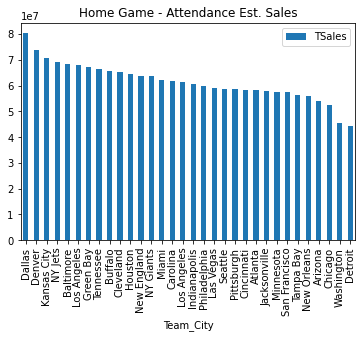

In [48]:
df_combo[['TSales', 'Team_City']].plot(x='Team_City', kind='bar', title='Home Game - Attendance Est. Sales')

<AxesSubplot:title={'center':'Attendance Ranking'}, xlabel='Team_City'>

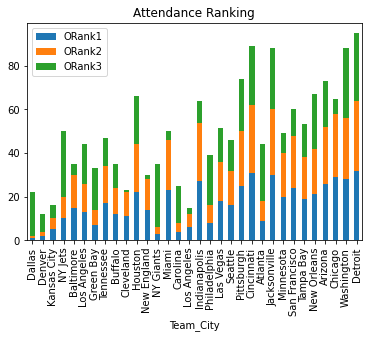

In [49]:
#TODO: Visually analyze growth across NFl Teams
df_combo[["ORank1", "ORank2", "ORank3", "Team_City"]].plot(x='Team_City'
                                                             , kind='bar', title='Attendance Ranking', stacked=True)

In [50]:
print("Top NFL Team Valuation Growth")
top_value = pd.DataFrame([valuation['Team_Name'], valuation['Value_2021'], valuation['Rank2021'], valuation['Value_2014'], valuation['Rank2014'], valuation['Growth'], valuation['Growth%']]).transpose()
top_value['RankDiff'] = top_value['Rank2014'] - top_value['Rank2021']
top_value.head()

Top NFL Team Valuation Growth


,Team_Name,Value_2021,Rank2021,Value_2014,Rank2014,Growth,Growth%,RankDiff
0,Dallas Cowboys,6500000000.000,32.000,2300000000.000,32.000,4200000000.000,1.826,0.000
1,New England Patriots,5000000000.000,31.000,1800000000.000,31.000,3200000000.000,1.778,0.000
2,New York Giants,4850000000.000,30.000,1550000000.000,29.000,3300000000.000,2.129,-1.000
3,San Francisco 49ers,4175000000.000,27.000,1224000000.000,23.000,2951000000.000,2.411,-4.000
4,Chicago Bears,4075000000.000,26.000,1252000000.000,25.000,2823000000.000,2.255,-1.000


<AxesSubplot:title={'center':'Valuation Ranking'}, xlabel='Team_Name'>

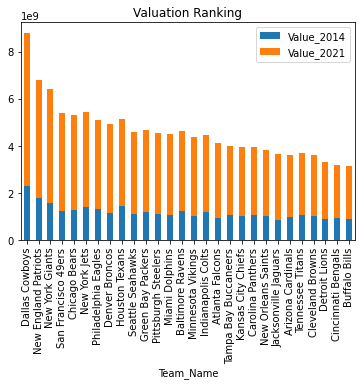

In [51]:

top_value['Value_2014'] = top_value['Value_2014'].astype(float)
top_value[["Value_2014", "Value_2021", "Team_Name"]].plot(x='Team_Name'
                                                             , kind='bar', title='Valuation Ranking', stacked=True)




<AxesSubplot:title={'center':'Growth Ranking'}, xlabel='Team_Name'>

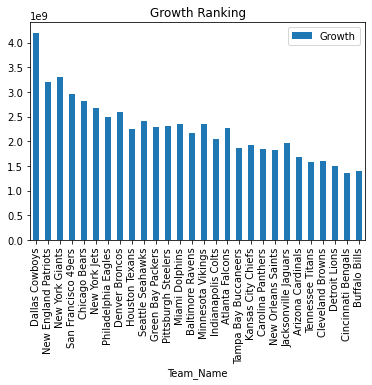

In [52]:
top_value[["Growth", "Team_Name"]].plot(x='Team_Name', kind='bar', title='Growth Ranking', stacked=True)

In [53]:
TEAM_2021['StatRank'] = TEAM_2021['Rate'].rank(ascending=True)
TEAM_2021['StatRank'] = TEAM_2021['StatRank'].astype(float)
TEAM_2021['Stat_Value'] = (((TEAM_2021['StatRank']) / 32)) * 15
TEAM_2021.head()

,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,Team_O,Team_Name,StatRank,Stat_Value
0,550,356,64.700,6.800,3746,21,15,85.800,181,32.900,42,7,73T,43,305,Team,Washington Football Team,11.000,5.156
1,731,492,67.300,7.400,5383,43,12,101.600,273,37.300,76,10,62T,23,154,Buccaneers,Tampa Bay Buccaneers,27.000,12.656
2,495,324,65.500,7.700,3815,30,7,103.100,166,33.500,56,12,84T,46,383,Seahawks,Seattle Seahawks,29.000,13.594
3,514,343,66.700,8.600,4437,26,14,99.200,200,38.900,63,11,83,33,216,49ers,San Francisco 49ers,24.000,11.250
4,674,443,65.700,7.400,5014,38,15,97.400,256,38.000,53,15,72T,31,214,Chargers,Los Angeles Chargers,22.000,10.312


In [54]:
Payroll['TRank'] = Payroll['TRank'].astype(float)
Payroll['TR_Value'] = ((Payroll['TRank']) / len(Payroll)) * 10
Payroll.rename(columns = {'Team' : 'Team_Name'}, inplace=True)
Payroll.head()

,Team_Name,Players,QB,RB/FB,WR,TE,OL,DL,LB,DB,K/P/LS,Total,TRank,Off_Total,DST_Total,TR_Value
22,New Orleans Saints,57.000,17200000.000,19300000.000,18900000.000,5900000.000,51600000.000,53900000.000,16400000.000,59300000.000,7700000.000,250000000.000,33.000,112900000.000,137300000.000,10.000
11,Green Bay Packers,52.000,51500000.000,9000000.000,13100000.000,5400000.000,31600000.000,21400000.000,55200000.000,37500000.000,7100000.000,231800000.000,32.000,110600000.000,121200000.000,9.697
8,Dallas Cowboys,58.000,37300000.000,23600000.000,29200000.000,7500000.000,61000000.000,37500000.000,7900000.000,22200000.000,4300000.000,231200000.000,31.000,158600000.000,71900000.000,9.394
17,Los Angeles Rams,60.000,23800000.000,6200000.000,40000000.000,11700000.000,36800000.000,44800000.000,23200000.000,35600000.000,4200000.000,226300000.000,30.000,118500000.000,107800000.000,9.091
20,Minnesota Vikings,57.000,47000000.000,18200000.000,26400000.000,3600000.000,22400000.000,53700000.000,28200000.000,20200000.000,1000000.000,220700000.000,29.000,117600000.000,103100000.000,8.788


In [55]:
print("Define the size of all tables")
print()
print("Rows in APT_2021: " + str(len(APT_2021)))
print("Rows in RZRA_2021: " + str(len(RZRA_2021)))
print("Rows in RZT_2021: " + str(len(RZT_2021)))
print("Rows in Att_2021: " + str(len(Att_2021)))
print("Rows in SI_2021: " + str(len(SI_2021)))
print("Rows in SI2_2021: " + str(len(SI2_2021)))

print("Rows in TEAM_2021: " + str(len(TEAM_2021)))
print("Rows in PValue: " + str(len(PValue)))
print("Rows in PFines: " + str(len(PFines)))
print("Rows in Payroll: " + str(len(Payroll)))
print("Rows in Franchise: " + str(len(Franchise)))
print("Rows in df_player: " + str(len(df_player)))
print("Rows in df_combo: " + str(len(df_combo)))
print("Rows in TValue: " + str(len(TValue)))
print("Rows in TFines: " + str(len(TFines)))
print("Rows in valuation: " + str(len(valuation)))
print("Rows in top_value: " + str(len(top_value)))

Define the size of all tables

Rows in APT_2021: 478
Rows in RZRA_2021: 199
Rows in RZT_2021: 390
Rows in Att_2021: 32
Rows in SI_2021: 30
Rows in SI2_2021: 26
Rows in TEAM_2021: 32
Rows in PValue: 162
Rows in PFines: 163
Rows in Payroll: 33
Rows in Franchise: 32
Rows in df_player: 449
Rows in df_combo: 32
Rows in TValue: 32
Rows in TFines: 32
Rows in valuation: 28
Rows in top_value: 28


In [56]:
print("Team valuation - Percentage of decision: 15.0% (Val_Value)")
print("Valuation Increase (2014-2021) - Percentage of decision: 5.0% (Grow_Value)")
valuation.head()

Team valuation - Percentage of decision: 15.0% (Val_Value)
Valuation Increase (2014-2021) - Percentage of decision: 5.0% (Grow_Value)


,Team_Name,Value(M),Value_2021,Rank2021,Team_Owner,Sale_Year,Sale_Price,Adj_for_Inflation,Value_2014,Rank2014,Growth,Growth%,Val_Value,GRank#,Grow_Value
0,Dallas Cowboys,6500.000,6500000000.000,32.000,Jerry Jones,1989,150000000.00,283018867.92,2300000000.000,32.000,4200000000.000,1.826,17.143,15.000,2.679
1,New England Patriots,5000.000,5000000000.000,31.000,Robert Kraft,1994,172000000.00,271293375.39,1800000000.000,31.000,3200000000.000,1.778,16.607,17.000,3.036
2,New York Giants,4850.000,4850000000.000,30.000,John Mara/Steve Tisch,1929,500.00,6849.32,1550000000.000,29.000,3300000000.000,2.129,16.071,9.000,1.607
3,San Francisco 49ers,4175.000,4175000000.000,27.000,Jed York,1977,13000000.00,50193050.19,1224000000.000,23.000,2951000000.000,2.411,14.464,2.000,0.357
4,Chicago Bears,4075.000,4075000000.000,26.000,McCaskey Family,1920,100.00,1162.79,1252000000.000,25.000,2823000000.000,2.255,13.929,5.000,0.893


In [57]:
print("Ticket Sales (2021) - Percentage of decision: 15.0% (TSR_Value)")
df_combo.rename(columns = {'Team' : 'Team_Name'}, inplace=True)
df_combo.head()

Ticket Sales (2021) - Percentage of decision: 15.0% (TSR_Value)


,AttRank#,Team_City,H_Games,H_Total,H_Avg,H_Pct%,R_Games,R_Total,R_Avg,R_Pct%,O_Games,O_Total,O_Avg,O_Pct%,ORank1,ORank2,ORank3,ORAvg,TSales,TSR#,TSR_Value,Team_Name
2,1,Dallas,8,747368,93421,93.4,9,619498,68833,95.3,17,1366866,80403,94.3,1.000,1.000,20.000,7.330,80342060.000,32.000,15.000,Dallas Cowboys
4,3,Denver,9,686129,76236,100.1,8,557752,69719,93.6,17,1243881,73169,97.1,2.000,2.000,8.000,4.000,73758867.500,31.000,14.531,Denver Broncos
6,5,Kansas City,9,659044,73227,100.4,8,533901,66737,93.7,17,1192945,70173,97.3,5.000,5.000,6.000,5.330,70847230.000,30.000,14.062,Kansas City Chiefs
8,7,NY Jets,9,645092,71676,86.9,8,528091,66011,96.2,17,1173183,69010,90.8,10.000,10.000,30.000,16.670,69347390.000,29.000,13.594,NaN
10,9,Baltimore,9,634840,70537,99.7,8,506317,63289,95.0,17,1141157,67126,97.5,15.000,15.000,5.000,11.670,68245300.000,28.000,13.125,Baltimore Ravens


In [58]:
print("Team Total Fines (2021) - Percentage of decision: 5.0% (R_Value)")
TFines = pd.merge(TNA_2021, TFines, how='inner', left_on='Team_A', right_on='Team')
TFines['Team_A_x'] = TFines['Team_A']

TFines.head()

Team Total Fines (2021) - Percentage of decision: 5.0% (R_Value)


,Team_A,Team_O,Team_Name,Amount,Rank,R_Value,Team_A_x
0,ATL,ATL,Atlanta Falcons,10300.000,1.000,-0.156,ATL
1,BUF,BUF,Buffalo Bills,68288.000,17.000,-2.656,BUF
2,CAR,CAR,Carolina Panthers,105066.670,22.000,-3.438,CAR
3,CHI,CHI,Chicago Bears,54850.000,13.000,-2.031,CHI
4,CIN,CIN,Cincinnati Bengals,34256.000,7.000,-1.094,CIN


In [59]:
print("Value Based on Players (2021) - Percentage of decision: 10.0% (TPRK_Value)")
TPValue = pd.merge(TNA_2021, TPValue, how='inner', left_on='Team_A', right_on='Team')
TPValue['Team_A_x'] = TPValue['Team_A']
TPValue.head()

Value Based on Players (2021) - Percentage of decision: 10.0% (TPRK_Value)


,Team_A,Team_O,Team_Name,Team,AvgVal,TPRK,TPRK_Value,Team_A_x
0,ATL,ATL,Atlanta Falcons,ATL,9.000,9.000,2.812,ATL
1,BUF,BUF,Buffalo Bills,BUF,20.000,20.000,6.250,BUF
2,CAR,CAR,Carolina Panthers,CAR,5.000,5.000,1.562,CAR
3,CHI,CHI,Chicago Bears,CHI,15.000,15.000,4.688,CHI
4,CIN,CIN,Cincinnati Bengals,CIN,16.000,16.000,5.000,CIN


In [60]:
print("Value Based Team Stats (2021) - Percentage of decision: 15.0% (Stat_Value)")
TEAM_2021.head()

Value Based Team Stats (2021) - Percentage of decision: 15.0% (Stat_Value)


,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,Team_O,Team_Name,StatRank,Stat_Value
0,550,356,64.700,6.800,3746,21,15,85.800,181,32.900,42,7,73T,43,305,Team,Washington Football Team,11.000,5.156
1,731,492,67.300,7.400,5383,43,12,101.600,273,37.300,76,10,62T,23,154,Buccaneers,Tampa Bay Buccaneers,27.000,12.656
2,495,324,65.500,7.700,3815,30,7,103.100,166,33.500,56,12,84T,46,383,Seahawks,Seattle Seahawks,29.000,13.594
3,514,343,66.700,8.600,4437,26,14,99.200,200,38.900,63,11,83,33,216,49ers,San Francisco 49ers,24.000,11.250
4,674,443,65.700,7.400,5014,38,15,97.400,256,38.000,53,15,72T,31,214,Chargers,Los Angeles Chargers,22.000,10.312


In [61]:
print("Value Based Team Payroll (2021) - Percentage of decision: 10.0% (TR_Value)")
Payroll.rename(columns = {'Team' : 'Team_Name'}, inplace=True)
Payroll.head()

Value Based Team Payroll (2021) - Percentage of decision: 10.0% (TR_Value)


,Team_Name,Players,QB,RB/FB,WR,TE,OL,DL,LB,DB,K/P/LS,Total,TRank,Off_Total,DST_Total,TR_Value
22,New Orleans Saints,57.000,17200000.000,19300000.000,18900000.000,5900000.000,51600000.000,53900000.000,16400000.000,59300000.000,7700000.000,250000000.000,33.000,112900000.000,137300000.000,10.000
11,Green Bay Packers,52.000,51500000.000,9000000.000,13100000.000,5400000.000,31600000.000,21400000.000,55200000.000,37500000.000,7100000.000,231800000.000,32.000,110600000.000,121200000.000,9.697
8,Dallas Cowboys,58.000,37300000.000,23600000.000,29200000.000,7500000.000,61000000.000,37500000.000,7900000.000,22200000.000,4300000.000,231200000.000,31.000,158600000.000,71900000.000,9.394
17,Los Angeles Rams,60.000,23800000.000,6200000.000,40000000.000,11700000.000,36800000.000,44800000.000,23200000.000,35600000.000,4200000.000,226300000.000,30.000,118500000.000,107800000.000,9.091
20,Minnesota Vikings,57.000,47000000.000,18200000.000,26400000.000,3600000.000,22400000.000,53700000.000,28200000.000,20200000.000,1000000.000,220700000.000,29.000,117600000.000,103100000.000,8.788


In [62]:
print("Sports Team Market Base (2021) - Percentage of decision: 5.0% (TCR_Value)")

STM_2021.head()

Sports Team Market Base (2021) - Percentage of decision: 5.0% (TCR_Value)


,STMRank,Metro_City,Homes,NBA_Name,NFL_Name,MLB_Name,NHL_Name,STMR#,STMR_Value,Team_Name
11,11,Phoenix,21580000.000,Suns,Cardinals,D’Backs,Coyotes,32.000,3.810,Arizona Cardinals
7,7,Atlanta,26490000.000,Hawks,Falcons,Braves,no team,36.000,4.286,Atlanta Falcons
28,28,Baltimore,11299999.000,no team,Ravens,Orioles,no team,15.000,1.786,Baltimore Ravens
41,53,Buffalo,6130000.000,no team,Bills,no team,Sabres,2.000,0.238,Buffalo Bills
22,22,Charlotte,12910000.000,Hornets,Panthers,no team,no team,21.000,2.500,Carolina Panthers


In [63]:
#TODO: Add Value Based on Valuation and Growth factors

TValue = pd.merge(TNA_2021, TValue, how='left', left_on='Team_O', right_on='Team')

TValue.head()

,Team_A,Team_O,Team_Name,sum,count,max,min,SumRank
0,ARZ,ARI,Arizona Cardinals,89474146.000,7,43008737.000,2063551.000,6.000
1,ATL,ATL,Atlanta Falcons,42877283.000,2,33735253.000,9142030.000,24.000
2,BLT,BAL,Baltimore Ravens,82676544.000,4,43125544.000,9974099.000,11.000
3,BUF,BUF,Buffalo Bills,74387522.000,7,22192964.000,3313594.000,13.000
4,CAR,CAR,Carolina Panthers,32270248.000,2,16907455.000,15362793.000,28.000


In [64]:
from functools import reduce
dfs1 = [TNA_2021, valuation, Franchise, Payroll, SI2_2021, TEAM_2021,  team_df_player1, STM_2021
        , WLD, df_combo, TFines, TFines, TPValue, Payroll2]
Final_List1 = reduce(lambda left,right: pd.merge(left,right,on='Team_Name'), dfs1)
Final_List1.rename(columns = {'Team_A_x':'Team_A'}, inplace = True)
Final_List1.rename(columns = {'Team_O_x':'Team_O'}, inplace = True)
Final_List1.head()



,Team_A_x_x,Team_O,Team_Name,Value(M)_x,Value_2021_x,Rank2021_x,Team_Owner,Sale_Year,Sale_Price,Adj_for_Inflation,Value_2014,Rank2014,Growth,Growth%,Val_Value,GRank#,Grow_Value,Value(M)_y,Value_2021_y,Rank2021_y,Players,QB,RB/FB,WR,TE_x,OL,DL,LB,DB,K/P/LS,Total_x,TRank,Off_Total,DST_Total,TR_Value,Team_x,Conference,latitude,longitude,zip,Stadium_Name,Capacity,Stadium_Location,Team_City_x,Team_State,Field_Type,Roof_Type,Opened,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,Team_O_y,StatRank,Stat_Value,PRank#,APTRank#,Compl,Targeted,Compl%,TD#,RZRARank#,RZRRush#,RZRTD#,RZTRank#,RZCompl,RZTargeted,RZCompl%,RZTD#,TPRK#,TOPRK_Value,STMRank,Metro_City,Homes,NBA_Name,NFL_Name,MLB_Name,NHL_Name,STMR#,STMR_Value,Team_y,Win_% 2001,Win_% 2002,Win_% 2003,Win_% 2004,Win_% 2005,Win_% 2006,Win_% 2007,Win_% 2008,Win_% 2009,Win_% 2010,Win_% 2011,Win_% 2012,Win_% 2013,Win_% 2014,Win_% 2015,Win_% 2016,Win_% 2017,Win_% 2018,Win_% 2019,Win_% 2020,Win_% 2021,Total_y,Average,WLDRank,WLD_Value,AttRank#,Team_City_y,H_Games,H_Total,H_Avg,H_Pct%,R_Games,R_Total,R_Avg,R_Pct%,O_Games,O_Total,O_Avg,O_Pct%,ORank1,ORank2,ORank3,ORAvg,TSales,TSR#,TSR_Value,Team_A_y,Team_O,Amount_x,Rank_x,R_Value_x,Team_A_x_x,Team_A,Team_O_y,Amount_y,Rank_y,R_Value_y,Team_A_x_y,Team_A_y,Team_O,Team,AvgVal,TPRK,TPRK_Value,Team_A,QB%,RB/FB%,WR%,TE_y,OL%,DL%,DB%,K/P/LS%,Off_Total%,DST_Total%
0,ATL,ATL,Atlanta Falcons,3200.000,3200000000.000,13.000,Arthur Blank,2002,545000000.00,708712613.78,933000000.000,7.000,2267000000.000,2.430,6.964,1.000,0.179,3200.000,3200000000.000,13.000,52.000,49500000.000,5600000.000,12700000.000,11400000.000,38400000.000,35300000.000,26200000.000,15800000.000,700000.000,195600000.000,20.000,117600000.000,78000000.000,6.061,Falcons,NFC,33.758,-84.401,30303,Mercedes-Benz Stadium,71000,"Atlanta, Georgia",Atlanta,Georgia,FieldTurf Revolution[28],Retractable,2017,573,377,65.800,7.000,3987,20,15,86.600,196,34.200,44,7,64,40,274,Falcons,12.000,5.625,408.381,253.714,24.714,36.143,62.994,1.357,676.214,3.500,0.643,295.214,3.571,6.143,44.860,1.214,23.000,4.259,7,Atlanta,26490000.000,Hawks,Falcons,Braves,no team,36.000,4.286,Atlanta Falcons Falcons,0.375,0.375,0.313,0.375,0.313,0.375,0.313,0.313,0.313,0.375,0.375,0.375,0.344,0.375,0.375,0.375,0.313,0.375,0.313,0.313,0.412,7.385,0.352,8.000,3.871,15,Atlanta,8,540690,67586,90.1,9,633218,70357,95.5,17,1173908,69053,92.9,9.000,9.000,26.000,14.670,58124175.000,10.000,4.688,ATL,ATL,10300.000,1.000,-0.156,ATL,ATL,ATL,10300.000,1.000,-0.156,ATL,ATL,ATL,ATL,9.000,9.000,2.812,ATL,25.307,2.863,6.493,5.828,19.632,18.047,8.078,0.358,60.123,39.877
1,BUF,BUF,Buffalo Bills,2270.000,2270000000.000,1.000,Ralph Wilson Trust,1959,25000.00,201612.90,870000000.000,3.000,1400000000.000,1.609,0.536,24.000,4.286,2270.000,2270000000.000,1.000,52.000,16400000.000,5600000.000,30400000.000,4400000.000,43900000.000,22700000.000,34600000.000,48500000.000,3900000.000,210500000.000,26.000,100700000.000,109700000.000,7.879,Bills,AFC,42.774,-78.787,14202,Highmark Stadium,71608,"Orchard Park, New York",Orchard Park,New York,A-Turf Titan 50[18],Open,1973,655,415,63.400,6.800,4450,36,16,91.300,236,36.000,51,8,61,27,166,Bills,17.000,7.969,369.499,299.786,27.857,40.643,58.019,2.571,542.429,5.786,0.929,266.286,5.286,8.714,49.227,2.071,26.000,4.815,53,Buffalo,6130000.000,no team,Bills,no team,Sabres,2.000,0.238,Buffalo Bills xz Bills xz,0.688,0.656,0.688,0.625,0.688,0.625,0.625,0.688,0.688,0.688,0.625,0.688,0.688,0.688,0.688,0.688,0.688,0.688,0.688,0.688,0.647,14.123,0.673,26.000,12.581,14,Buffalo,9,610352,67816,94.7,8,549286,68660,98.6,17,1159638,68214,96.5,12.000,12.000,11.000,11.670,65612840.000,24.000,11.250,BUF,BUF,68288.000,17.000,-2.656,BUF,BUF,BUF,68288.000,17.000,-2.656,BUF,BUF,BUF,BUF,20.000,20.000,6.250,BUF,7.791,2.660,14.442,2.090,20.855,10.784,23.040,1.853,47.838,52.114
2,CAR,CAR,Carolina Panthers,2910.000,2910000000.000,9.000,Jerry Richardson,1993,206000000.00,333333333.33,1057000000.000,15.000,1853000000.000,1.753,

In [65]:
Final_List2 = pd.DataFrame(Final_List1)
Final_List2['Score'] = (Final_List2['Val_Value'] + Final_List2['Grow_Value'] + Final_List2['TR_Value'] 
                        + Final_List2['Stat_Value'] + Final_List2['TOPRK_Value'] + Final_List2['STMR_Value'] 
                        + Final_List2['TPRK_Value'] + Final_List2['WLD_Value'] + Final_List2['TSR_Value']
                       + Final_List2['R_Value_y'])
Final_List2 = Final_List2.reset_index()
Final_List2 = Final_List2.sort_values(by="Score", ascending=False)


Final_List2.head(10)

,index,Team_A_x_x,Team_O,Team_Name,Value(M)_x,Value_2021_x,Rank2021_x,Team_Owner,Sale_Year,Sale_Price,Adj_for_Inflation,Value_2014,Rank2014,Growth,Growth%,Val_Value,GRank#,Grow_Value,Value(M)_y,Value_2021_y,Rank2021_y,Players,QB,RB/FB,WR,TE_x,OL,DL,LB,DB,K/P/LS,Total_x,TRank,Off_Total,DST_Total,TR_Value,Team_x,Conference,latitude,longitude,zip,Stadium_Name,Capacity,Stadium_Location,Team_City_x,Team_State,Field_Type,Roof_Type,Opened,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,Team_O_y,StatRank,Stat_Value,PRank#,APTRank#,Compl,Targeted,Compl%,TD#,RZRARank#,RZRRush#,RZRTD#,RZTRank#,RZCompl,RZTargeted,RZCompl%,RZTD#,TPRK#,TOPRK_Value,STMRank,Metro_City,Homes,NBA_Name,NFL_Name,MLB_Name,NHL_Name,STMR#,STMR_Value,Team_y,Win_% 2001,Win_% 2002,Win_% 2003,Win_% 2004,Win_% 2005,Win_% 2006,Win_% 2007,Win_% 2008,Win_% 2009,Win_% 2010,Win_% 2011,Win_% 2012,Win_% 2013,Win_% 2014,Win_% 2015,Win_% 2016,Win_% 2017,Win_% 2018,Win_% 2019,Win_% 2020,Win_% 2021,Total_y,Average,WLDRank,WLD_Value,AttRank#,Team_City_y,H_Games,H_Total,H_Avg,H_Pct%,R_Games,R_Total,R_Avg,R_Pct%,O_Games,O_Total,O_Avg,O_Pct%,ORank1,ORank2,ORank3,ORAvg,TSales,TSR#,TSR_Value,Team_A_y,Team_O,Amount_x,Rank_x,R_Value_x,Team_A_x_x,Team_A,Team_O_y,Amount_y,Rank_y,R_Value_y,Team_A_x_y,Team_A_y,Team_O,Team,AvgVal,TPRK,TPRK_Value,Team_A,QB%,RB/FB%,WR%,TE_y,OL%,DL%,DB%,K/P/LS%,Off_Total%,DST_Total%,Score
5,5,DAL,DAL,Dallas Cowboys,6500.000,6500000000.000,32.000,Jerry Jones,1989,150000000.00,283018867.92,2300000000.000,32.000,4200000000.000,1.826,17.143,15.000,2.679,6500.000,6500000000.000,32.000,58.000,37300000.000,23600000.000,29200000.000,7500000.000,61000000.000,37500000.000,7900000.000,22200000.000,4300000.000,231200000.000,31.000,158600000.000,71900000.000,9.394,Cowboys,NFC,32.748,-97.093,75203,AT&T Stadium,80000,"Arlington, Texas",Arlington,Texas,Hellas Matrix Turf,Retractable,2009,647,444,68.600,7.700,4963,40,11,104.800,248,38.300,63,9,73T,33,163,Cowboys,30.000,14.062,392.511,256.067,27.800,40.200,68.549,2.333,694.200,4.467,0.800,227.267,4.333,6.800,69.072,1.667,25.000,4.630,5,Dallas- Ft. Worth,29630000.000,Mavericks,Cowboys,Rangers,Stars,38.000,4.524,Dallas Cowboys xz Cowboys xz,0.750,0.625,0.750,0.688,0.688,0.625,0.688,0.688,0.688,0.688,0.750,0.719,0.688,0.688,0.688,0.688,0.688,0.688,0.750,0.750,0.706,14.681,0.699,27.000,13.065,1,Dallas,8,747368,93421,93.4,9,619498,68833,95.3,17,1366866,80403,94.3,1.000,1.000,20.000,7.330,80342060.000,32.000,15.000,DAL,DAL,753960.000,30.000,-4.688,DAL,DAL,DAL,753960.000,30.000,-4.688,DAL,DAL,DAL,DAL,23.000,23.000,7.188,DAL,16.133,10.208,12.630,3.244,26.384,16.220,9.602,1.860,68.599,31.099,82.996
8,8,GB,GB,Green Bay Packers,3475.000,3475000000.000,20.000,"Green Bay Packers, Inc.",1919,50.00,675.68,1183000000.000,21.000,2292000000.000,1.937,10.714,11.000,1.964,3475.000,3475000000.000,20.000,52.000,51500000.000,9000000.000,13100000.000,5400000.000,31600000.000,21400000.000,55200000.000,37500000.000,7100000.000,231800000.000,32.000,110600000.000,121200000.000,9.697,Packers,NFC,44.501,-88.062,54301,Lambeau Field,81441,"Green Bay, Wisconsin",Green Bay,Wisconsin,Desso GrassMaster[19],Open,1957,593,402,67.800,7.600,4526,39,7,107.400,235,39.600,61,11,75T,33,211,Packers,32.000,15.000,486.374,294.562,21.375,30.938,65.546,2.125,767.688,4.812,0.562,396.875,4.125,6.938,44.146,1.750,6.000,1.111,37,Milwaukee,9220000.000,Bucks,Packers,Brewers,no team,8.000,0.952,Green Bay Packers xz* Packers xz*,0.875,0.750,0.813,0.875,0.813,0.813,0.813,0.750,0.813,0.813,0.813,0.813,0.813,0.750,0.813,0.813,0.813,0.813,0.813,0.813,0.765,16.960,0.808,31.000,15.000,2,Green Bay,8,623929,77991,95.8,9,563303,62589,93.4,17,1187232,69837,94.6,7.000,7.000,19.000,11.000,67072367.500,26.000,12.188,GB,GB,71035.110,18.000,-2.812,GB,GB,GB,71035.110,18.000,-2.812,GB,GB,GB,GB,32.000,32.000,10.000,GB,22.217,3.883,5.651,2.330,13.632,9.232,16.178,3.063,47.714,52.286,73.814
9,9,GB,GB,Green Bay Packers,3475.000,3475000000.000,20.000,"Green Bay Packers, Inc.",1919,50.

In [66]:
print("Create Buyer List Database based on the Top 10 selections based on top scores and by Sports Team Market (STM)")

Buyer_List = pd.DataFrame(Final_List2.head(10))
Buyer_List = Buyer_List.reset_index()
Buyer_List

Create Buyer List Database based on the Top 10 selections based on top scores and by Sports Team Market (STM)


,level_0,index,Team_A_x_x,Team_O,Team_Name,Value(M)_x,Value_2021_x,Rank2021_x,Team_Owner,Sale_Year,Sale_Price,Adj_for_Inflation,Value_2014,Rank2014,Growth,Growth%,Val_Value,GRank#,Grow_Value,Value(M)_y,Value_2021_y,Rank2021_y,Players,QB,RB/FB,WR,TE_x,OL,DL,LB,DB,K/P/LS,Total_x,TRank,Off_Total,DST_Total,TR_Value,Team_x,Conference,latitude,longitude,zip,Stadium_Name,Capacity,Stadium_Location,Team_City_x,Team_State,Field_Type,Roof_Type,Opened,Att,Cmp,Cmp %,Yds/Att,Pass Yds,TD,INT,Rate,1st,1st%,20+,40+,Lng,Sck,SckY,Team_O_y,StatRank,Stat_Value,PRank#,APTRank#,Compl,Targeted,Compl%,TD#,RZRARank#,RZRRush#,RZRTD#,RZTRank#,RZCompl,RZTargeted,RZCompl%,RZTD#,TPRK#,TOPRK_Value,STMRank,Metro_City,Homes,NBA_Name,NFL_Name,MLB_Name,NHL_Name,STMR#,STMR_Value,Team_y,Win_% 2001,Win_% 2002,Win_% 2003,Win_% 2004,Win_% 2005,Win_% 2006,Win_% 2007,Win_% 2008,Win_% 2009,Win_% 2010,Win_% 2011,Win_% 2012,Win_% 2013,Win_% 2014,Win_% 2015,Win_% 2016,Win_% 2017,Win_% 2018,Win_% 2019,Win_% 2020,Win_% 2021,Total_y,Average,WLDRank,WLD_Value,AttRank#,Team_City_y,H_Games,H_Total,H_Avg,H_Pct%,R_Games,R_Total,R_Avg,R_Pct%,O_Games,O_Total,O_Avg,O_Pct%,ORank1,ORank2,ORank3,ORAvg,TSales,TSR#,TSR_Value,Team_A_y,Team_O,Amount_x,Rank_x,R_Value_x,Team_A_x_x,Team_A,Team_O_y,Amount_y,Rank_y,R_Value_y,Team_A_x_y,Team_A_y,Team_O,Team,AvgVal,TPRK,TPRK_Value,Team_A,QB%,RB/FB%,WR%,TE_y,OL%,DL%,DB%,K/P/LS%,Off_Total%,DST_Total%,Score
0,5,5,DAL,DAL,Dallas Cowboys,6500.000,6500000000.000,32.000,Jerry Jones,1989,150000000.00,283018867.92,2300000000.000,32.000,4200000000.000,1.826,17.143,15.000,2.679,6500.000,6500000000.000,32.000,58.000,37300000.000,23600000.000,29200000.000,7500000.000,61000000.000,37500000.000,7900000.000,22200000.000,4300000.000,231200000.000,31.000,158600000.000,71900000.000,9.394,Cowboys,NFC,32.748,-97.093,75203,AT&T Stadium,80000,"Arlington, Texas",Arlington,Texas,Hellas Matrix Turf,Retractable,2009,647,444,68.600,7.700,4963,40,11,104.800,248,38.300,63,9,73T,33,163,Cowboys,30.000,14.062,392.511,256.067,27.800,40.200,68.549,2.333,694.200,4.467,0.800,227.267,4.333,6.800,69.072,1.667,25.000,4.630,5,Dallas- Ft. Worth,29630000.000,Mavericks,Cowboys,Rangers,Stars,38.000,4.524,Dallas Cowboys xz Cowboys xz,0.750,0.625,0.750,0.688,0.688,0.625,0.688,0.688,0.688,0.688,0.750,0.719,0.688,0.688,0.688,0.688,0.688,0.688,0.750,0.750,0.706,14.681,0.699,27.000,13.065,1,Dallas,8,747368,93421,93.4,9,619498,68833,95.3,17,1366866,80403,94.3,1.000,1.000,20.000,7.330,80342060.000,32.000,15.000,DAL,DAL,753960.000,30.000,-4.688,DAL,DAL,DAL,753960.000,30.000,-4.688,DAL,DAL,DAL,DAL,23.000,23.000,7.188,DAL,16.133,10.208,12.630,3.244,26.384,16.220,9.602,1.860,68.599,31.099,82.996
1,8,8,GB,GB,Green Bay Packers,3475.000,3475000000.000,20.000,"Green Bay Packers, Inc.",1919,50.00,675.68,1183000000.000,21.000,2292000000.000,1.937,10.714,11.000,1.964,3475.000,3475000000.000,20.000,52.000,51500000.000,9000000.000,13100000.000,5400000.000,31600000.000,21400000.000,55200000.000,37500000.000,7100000.000,231800000.000,32.000,110600000.000,121200000.000,9.697,Packers,NFC,44.501,-88.062,54301,Lambeau Field,81441,"Green Bay, Wisconsin",Green Bay,Wisconsin,Desso GrassMaster[19],Open,1957,593,402,67.800,7.600,4526,39,7,107.400,235,39.600,61,11,75T,33,211,Packers,32.000,15.000,486.374,294.562,21.375,30.938,65.546,2.125,767.688,4.812,0.562,396.875,4.125,6.938,44.146,1.750,6.000,1.111,37,Milwaukee,9220000.000,Bucks,Packers,Brewers,no team,8.000,0.952,Green Bay Packers xz* Packers xz*,0.875,0.750,0.813,0.875,0.813,0.813,0.813,0.750,0.813,0.813,0.813,0.813,0.813,0.750,0.813,0.813,0.813,0.813,0.813,0.813,0.765,16.960,0.808,31.000,15.000,2,Green Bay,8,623929,77991,95.8,9,563303,62589,93.4,17,1187232,69837,94.6,7.000,7.000,19.000,11.000,67072367.500,26.000,12.188,GB,GB,71035.110,18.000,-2.812,GB,GB,GB,71035.110,18.000,-2.812,GB,GB,GB,GB,32.000,32.000,10.000,GB,22.217,3.883,5.651,2.330,13.632,9.232,16.178,3.063,47.714,52.286,73.814
2,9,9,GB,GB,Green Bay Packers,3475.000,3475000000.000,20.000,"Green Bay Packers, 

In [67]:
print("Create Buyer List Summary")

BLSummary = pd.DataFrame()
BLSummary['Team_Name'] = Buyer_List['Team_Name']
BLSummary['Conference'] = Buyer_List['Conference']
BLSummary['Owned_By'] = Buyer_List['Team_Owner']
BLSummary['Value_2021'] = Buyer_List['Value_2021_x']
BLSummary['Metro-Market'] = Buyer_List['Metro_City']
BLSummary['Homes'] = Buyer_List['Homes']
BLSummary['Payroll_2021'] = Buyer_List['Total_x']
BLSummary['Score'] = Buyer_List['Score']
BLSummary['Score'] = BLSummary['Score'].astype(float)
BLSummary['SCRank'] = BLSummary['Score'].rank(ascending=False).astype(float)
BLSummary = BLSummary.sort_values('SCRank')

BLSummary

Create Buyer List Summary


,Team_Name,Conference,Owned_By,Value_2021,Metro-Market,Homes,Payroll_2021,Score,SCRank
0,Dallas Cowboys,NFC,Jerry Jones,6500000000.000,Dallas- Ft. Worth,29630000.000,231200000.000,82.996,1.000
1,Green Bay Packers,NFC,"Green Bay Packers, Inc.",3475000000.000,Milwaukee,9220000.000,231800000.000,73.814,2.000
2,Green Bay Packers,NFC,"Green Bay Packers, Inc.",3475000000.000,Green Bay-Appleton*,4560000.000,231800000.000,72.981,3.000
3,New England Patriots,AFC,Robert Kraft,5000000000.000,Boston,24900000.000,202300000.000,72.286,4.000
4,Kansas City Chiefs,AFC,Lamar Hunt Family,2930000000.000,Kansas City,9860000.000,194300000.000,62.400,5.000
5,Tennessee Titans,AFC,Kenneth Adams Jr,2625000000.000,Nashville,11020000.000,220000000.000,55.767,6.000
6,Buffalo Bills,AFC,Ralph Wilson Trust,2270000000.000,Buffalo,6130000.000,210500000.000,53.146,7.000
7,Philadelphia Eagles,NFC,Jeffrey Lurie,3800000000.000,Philadelphia,29970000.000,194400000.000,52.746,8.000
8,Seattle Seahawks,NFC,Paul Allen,3500000000.000,Seattle- Tacoma,20990000.000,172500000.000,49.345,9.000
9,Minnesota Vikings,NFC,Zygmunt Wilf,3350000000.000,Minneapolis- St. Paul,18870000.000,220700000.000,48.812,10.000


In [68]:
from ipyleaflet import Map
from ipyleaflet import basemaps
from ipyleaflet import Marker
m = Map(center=(39,-98), zoom=4, basemap = basemaps.Esri.WorldStreetMap)

for name, lon, lat in Buyer_List[["Team", "longitude", "latitude"]].values:
    marker = Marker(location=(lat, lon), draggable=False, title=name, alt=name)
    m.add_layer(marker)

m.layout.height="550px"
print("Stadium Locations on Buyer List on U.S. Map")
m

Stadium Locations on Buyer List on U.S. Map


Map(center=[39, -98], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_te…

In [69]:
print("Create Financial Summary of Buyer List")

BLDollars = pd.DataFrame()
BLDollars['Team_Name'] = Buyer_List['Team_Name']
BLDollars['Metro-Market'] = Buyer_List['Metro_City']
BLDollars['Val2021'] = Buyer_List['Value_2021_x']
BLDollars['20YWin%'] = (Buyer_List['Average'].astype(float)) * 100
BLDollars['PayrollAmt'] = Buyer_List['Total_x']
BLDollars['OFF%'] = Buyer_List['Off_Total%']
BLDollars['DST%'] = Buyer_List['DST_Total%']
BLDollars['FinesT'] = Buyer_List['Amount_x']
BLDollars['TcktSales'] = Buyer_List['TSales']
BLDollars['HAvgAtt'] = Buyer_List['H_Avg']
BLDollars

Create Financial Summary of Buyer List


,Team_Name,Metro-Market,Val2021,20YWin%,PayrollAmt,OFF%,DST%,FinesT,TcktSales,HAvgAtt
0,Dallas Cowboys,Dallas- Ft. Worth,6500000000.000,69.910,231200000.000,68.599,31.099,753960.000,80342060.000,93421
1,Green Bay Packers,Milwaukee,3475000000.000,80.762,231800000.000,47.714,52.286,71035.110,67072367.500,77991
2,Green Bay Packers,Green Bay-Appleton*,3475000000.000,80.762,231800000.000,47.714,52.286,71035.110,67072367.500,77991
3,New England Patriots,Boston,5000000000.000,61.743,202300000.000,49.432,50.667,31120.000,63736965.000,65878
4,Kansas City Chiefs,Kansas City,2930000000.000,72.429,194300000.000,56.922,43.129,58957.000,70847230.000,73227
5,Tennessee Titans,Nashville,2625000000.000,77.790,220000000.000,56.818,43.182,36565.000,66338465.000,68566
6,Buffalo Bills,Buffalo,2270000000.000,67.252,210500000.000,47.838,52.114,68288.000,65612840.000,67816
7,Philadelphia Eagles,Philadelphia,3800000000.000,53.738,194400000.000,42.233,57.819,20133.000,60024560.000,69796
8,Seattle Seahawks,Seattle- Tacoma,3500000000.000,39.333,172500000.000,49.681,50.261,74883.000,58830880.000,68408
9,Minnesota Vikings,Minneapolis- St. Paul,3350000000.000,45.724,220700000.000,53.285,46.715,39781.000,57363397.500,66701
